# Análisis de sentimiento sobre la salud mental

Este conjunto de datos completo es una colección meticulosamente seleccionada de estados de salud mental etiquetados a partir de varias declaraciones. El conjunto de datos amalgama datos sin procesar de múltiples fuentes, limpios y compilados.
Fuente: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health?resource=download

El conjunto de datos consta de declaraciones etiquetadas con uno de los siguientes siete estados de salud mental:

Normal,
Depression,
Suicidal,
Anxiety,
Stress,
Bi-Polar,
Personality Disorder

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df=pd.read_csv('CombinedData.csv')

In [48]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [50]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [51]:

df = df.drop(columns=['Unnamed: 0'])


In [52]:
df.sample()

,statement,status
48303,How do you manage your stress even when you ca...,Stress


In [53]:
# Contar cuántos valores nulos hay en la columna 'statement'
nulos = df['statement'].isnull().sum()

# Mostrar el número de nulos
print(f"Número de valores nulos en 'statement': {nulos}")



Número de valores nulos en 'statement': 362


In [54]:
# Mostrar una de las filas donde 'statement' es nulo
nulo_ejemplo = df[df['statement'].isnull()]

# Mostrar la fila
nulo_ejemplo


,statement,status
293,NaN,Anxiety
572,NaN,Anxiety
595,NaN,Anxiety
1539,NaN,Normal
2448,NaN,Normal
...,...,...
52838,NaN,Anxiety
52870,NaN,Anxiety
52936,NaN,Anxiety
53010,NaN,Anxiety


In [55]:
# Eliminar las filas donde 'statement' es nulo
df = df.dropna(subset=['statement'])

# Mostrar el DataFrame sin los nulos
df.shape


(52681, 2)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


Ya no hay nulos. Vamos a crear una nueva columna con la longitud de los mensajes en la columna statement

In [57]:
df["len"]=df['statement'].apply(len) ## crear nueva columna len
df

,statement,status,len
0,oh my gosh,Anxiety,10
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78
3,I've shifted my focus to something else but I'...,Anxiety,61
4,"I'm restless and restless, it's been a month n...",Anxiety,72
...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012
53040,Is there any way to sleep better? I can't slee...,Anxiety,85
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401


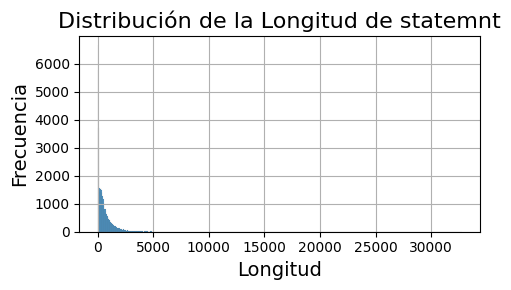

In [61]:


# Crear el histograma con ajustes
plt.figure(figsize=(5, 3))  # Ajustar el tamaño de la figura
sns.histplot(df["len"])  # Ajustar el número de bins y agregar la línea de densidad

# Personalizar el gráfico
plt.title('Distribución de la Longitud de statemnt', fontsize=16)  # Título del gráfico
plt.xlabel('Longitud', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.grid(True)  # Agregar una cuadrícula para facilitar la lectura

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


Vamos a ver las estadísticas de hada enfermedad

In [10]:
df["status"].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

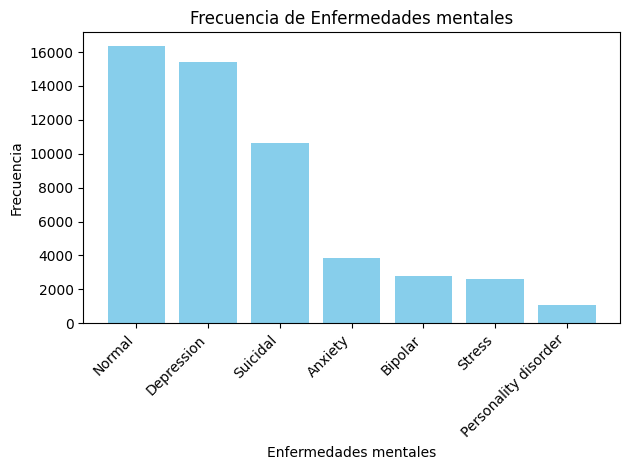

In [11]:


# Contar las frecuencias de cada categoría
frecuencias = df['status'].value_counts()

# Crear el histograma con matplotlib
plt.bar(frecuencias.index, frecuencias.values, color='skyblue')

# Personalizar el gráfico
plt.title('Frecuencia de Enfermedades mentales')
plt.xlabel('Enfermedades mentales')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar que se recorte el gráfico
plt.show()

In [12]:
df.sample()

,Unnamed: 0,statement,status,len
12147,12147,It feels so stupid but it is been a day and a ...,Depression,693


Vamos a crear una columna llamada enfermo, donde 'no' es que el comentario muestra una condición Normal y 'si' cuando el comentario muestra alguna enfermedad mental

In [62]:
df['enfermo'] = df['status'].apply(lambda x: 'si' if x != 'Normal' else 'No')
df


,statement,status,len,enfermo
0,oh my gosh,Anxiety,10,si
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,si
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,si
3,I've shifted my focus to something else but I'...,Anxiety,61,si
4,"I'm restless and restless, it's been a month n...",Anxiety,72,si
...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766,si
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,si
53040,Is there any way to sleep better? I can't slee...,Anxiety,85,si
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,si


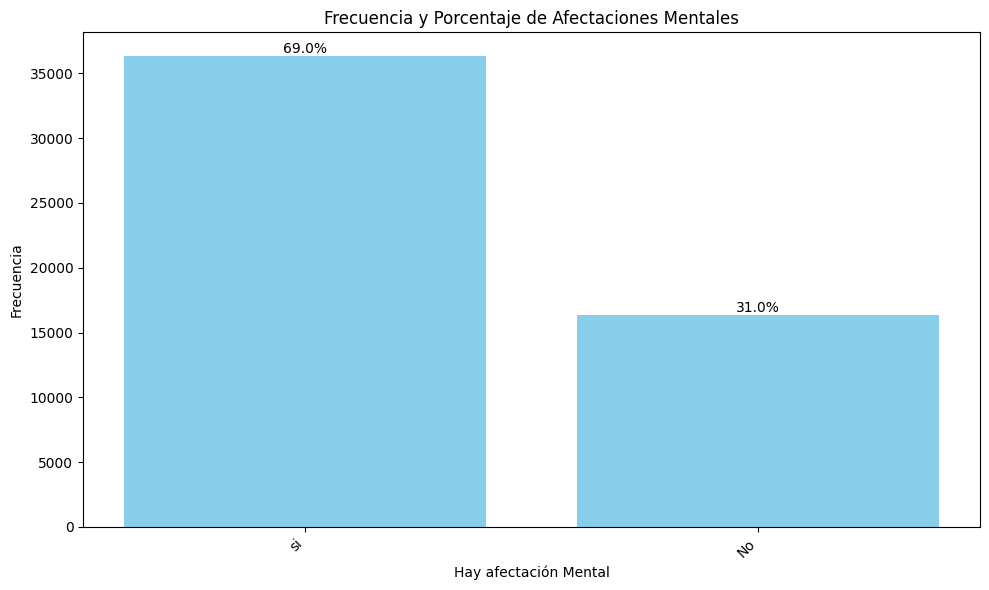

In [65]:


# Contar las frecuencias de cada categoría
frecuencias = df['enfermo'].value_counts()

# Calcular los porcentajes
porcentajes = (frecuencias / frecuencias.sum()) * 100

# Crear el histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
bars = plt.bar(frecuencias.index, frecuencias.values, color='skyblue')

# Agregar porcentajes sobre cada barra
for bar, porcentaje in zip(bars, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{porcentaje:.1f}%', ha='center', va='bottom')

# Personalizar el gráfico
plt.xlabel('Hay afectación Mental')
plt.ylabel('Frecuencia')
plt.title('Frecuencia y Porcentaje de Afectaciones Mentales')

plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x
plt.tight_layout()  # Ajustar el layout para evitar que se recorte el gráfico
plt.show()


# Encontrar palabras mas frecuentes

Encontremos las diez palabras sin stopwrods que aparecen con mayor frecuencia en: (i) todas las reseñas, (ii) En cada enfermedad

In [66]:
from sklearn.feature_extraction.text import CountVectorizer






In [67]:
def get_top_n_words(corpus:list, n:int=1, k:int=1):
    '''
    Encontrar las n palabras más frecuentes en una lista de comentarios
    '''
    #t1 = datetime.now()
    vec = CountVectorizer(ngram_range=(k, k), stop_words="english")
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [68]:
%%time
# Todos los reviews
common_words = get_top_n_words(df['statement'], 20, 1)
for word, freq in common_words:
    print(word, freq)
    


just 49039
like 38493
feel 31666
want 27355
know 23631
life 22707
time 18303
people 16911
really 16400
going 13892
think 13080
day 11987
don 11770
help 10848
ve 10262
things 9908
did 9880
anymore 9680
anxiety 9571
years 9513
CPU times: user 2.49 s, sys: 38.3 ms, total: 2.53 s
Wall time: 2.53 s


<Axes: title={'center': 'Las 20 palabras más comunes en todos los comentarios'}, xlabel='words'>

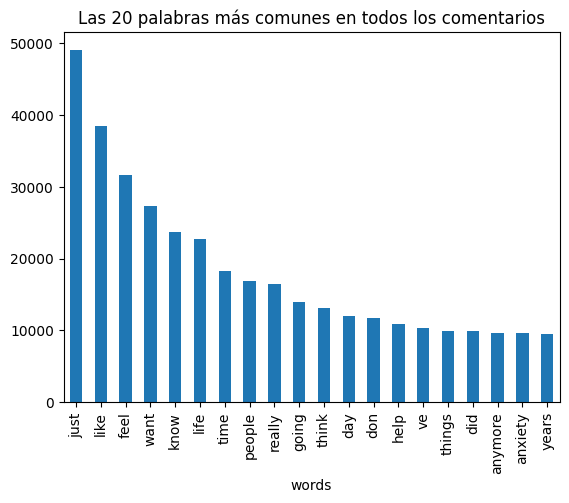

In [69]:
df_common = pd.DataFrame(common_words, columns=["words", "count"])
df_common.groupby("words").sum()["count"].sort_values(ascending=False).plot(
    kind="bar", title="Las 20 palabras más comunes en todos los comentarios"
)

In [70]:
Enfermedades=df['status'].unique()

In [71]:
Enfermedades

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

Vamos a generar las 20 palabras más comunes de acuerdo  a cada enfermedad

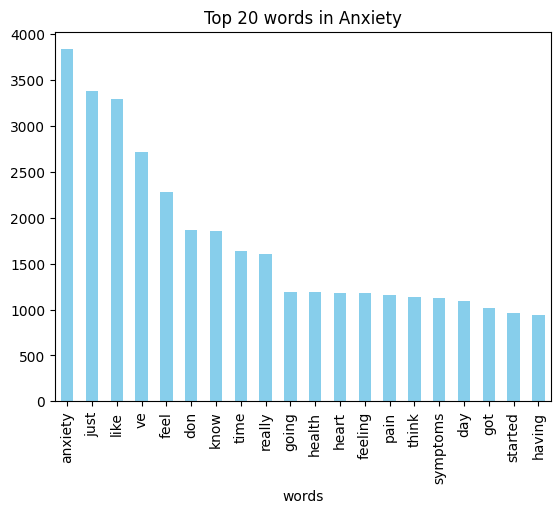

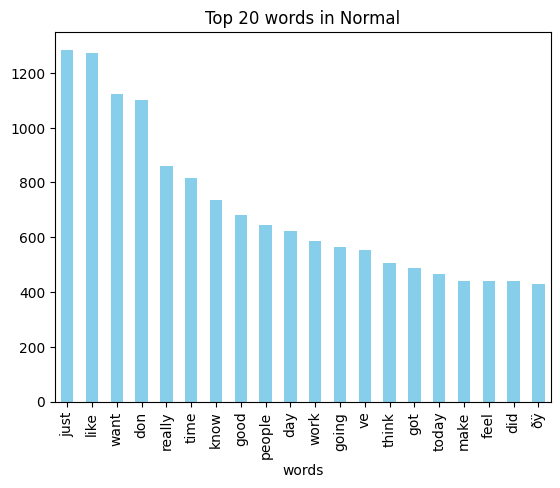

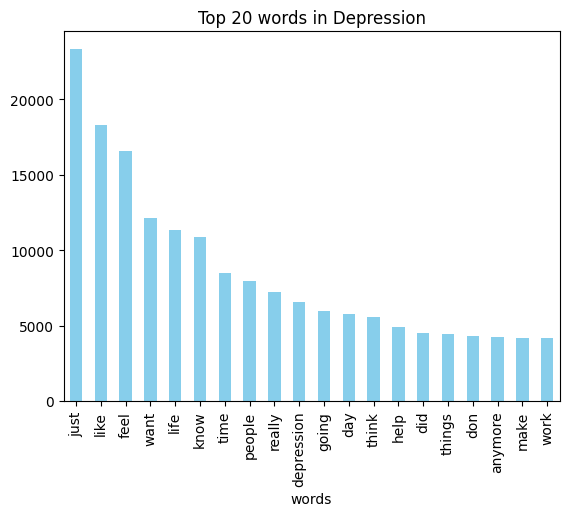

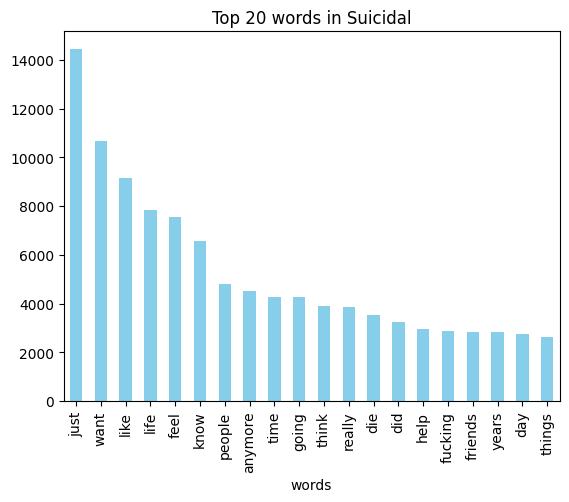

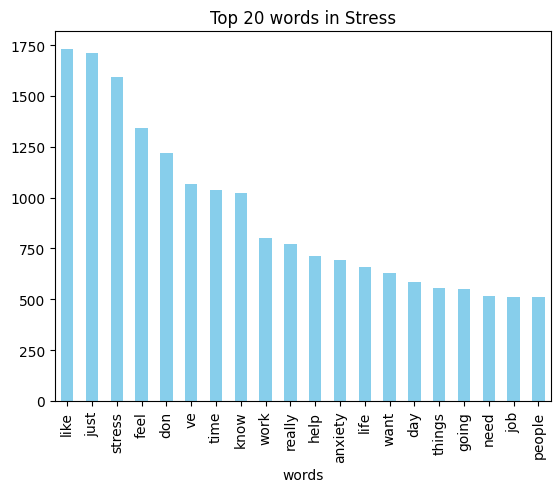

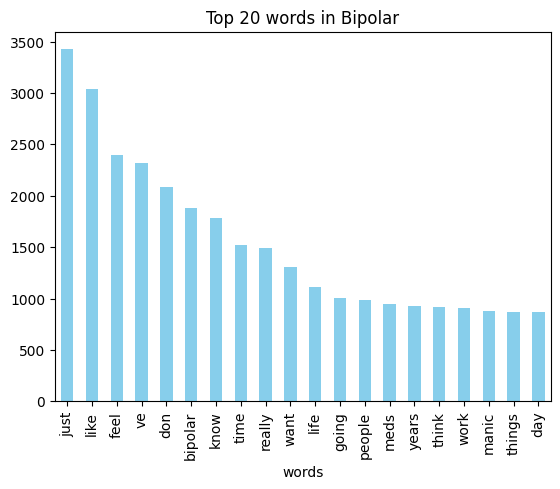

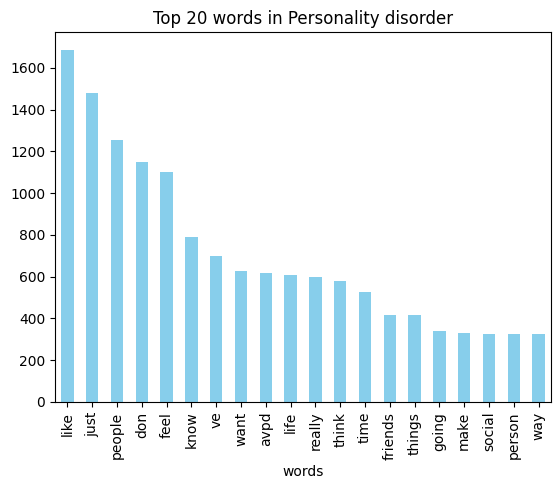

In [73]:
for x in Enfermedades:
    # Obtener las 20 palabras más comunes  para cada enfermedad
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20)
    
    # Crear el DataFrame con las palabras y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por las palabras y sumar las frecuencias
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 words in {x}', 
        color='skyblue'
    )
    
    # Mostrar el gráfico
    plt.show()


In [75]:
Enfermedades

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

# n-grams

Hemos visto que las palabras individuales no siempre son muy informativas. Para cada enfermedad vamoas a ver si los bi gramas o trigramas nos dan más información de las particulariddes de cada enfermedad.

In [77]:
import numpy as np

Enfermedades_Sin_Normal = np.array(Enfermedades)[[0, 2, 3, 4, 5]] # Este arreglo solo va a contener las enfermedades, se excluye la condición de normal





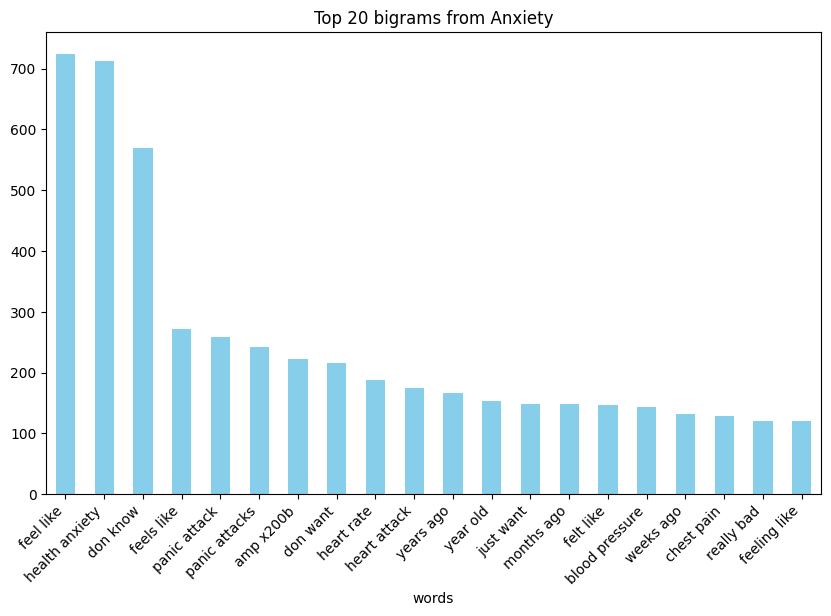

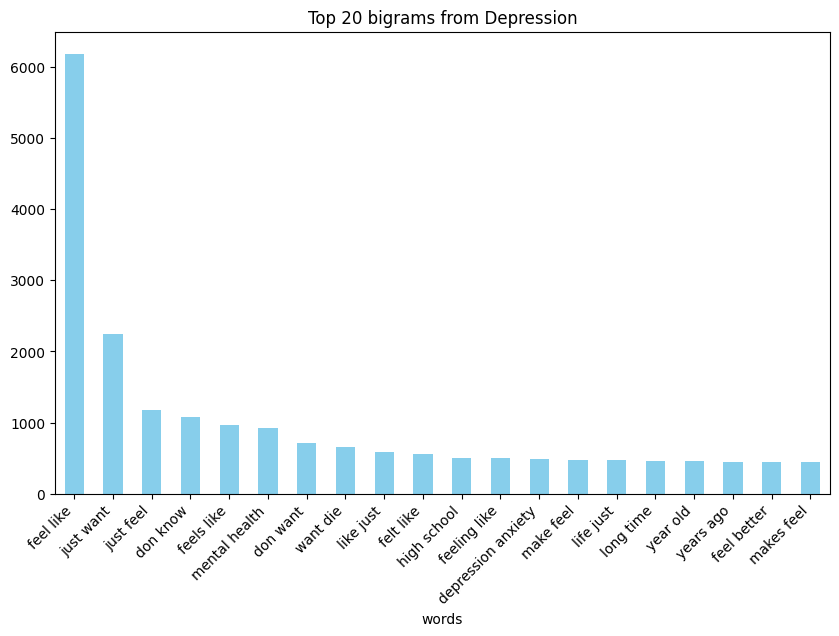

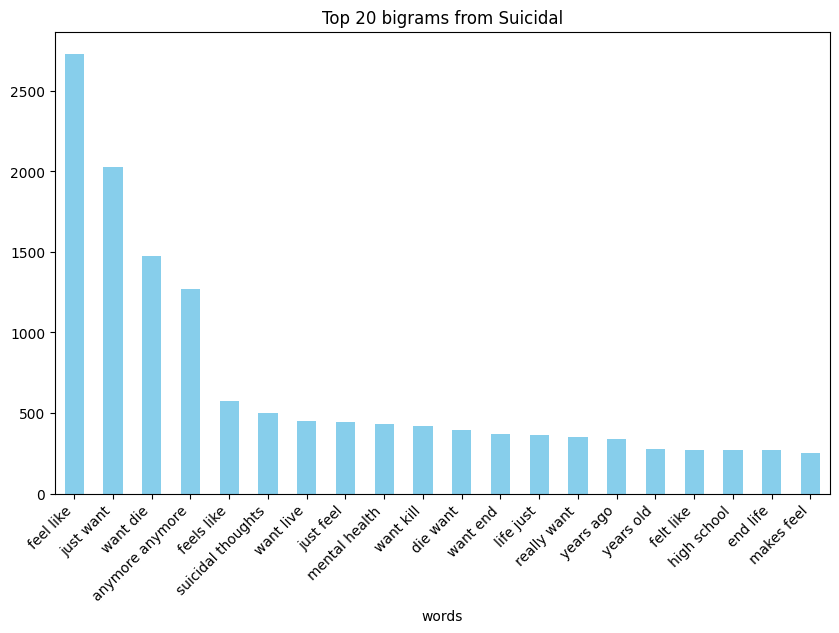

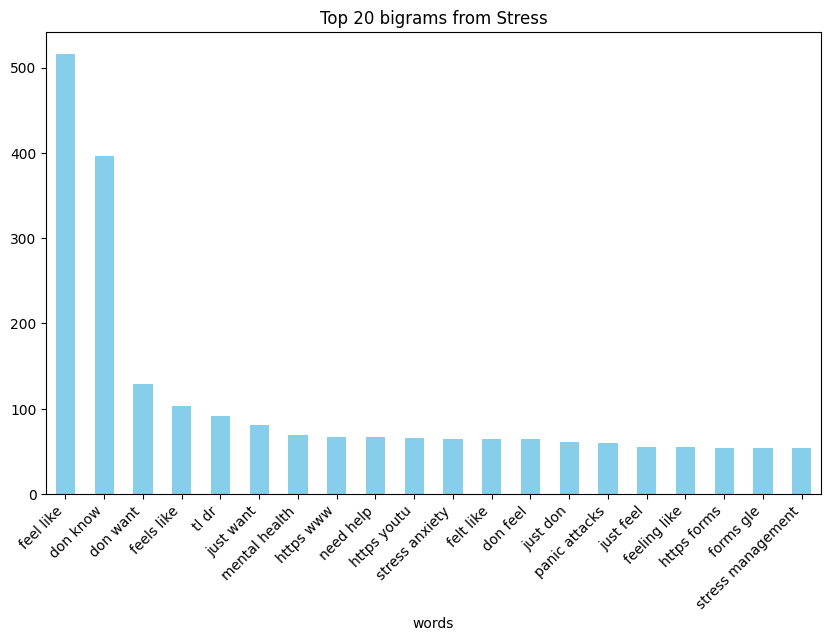

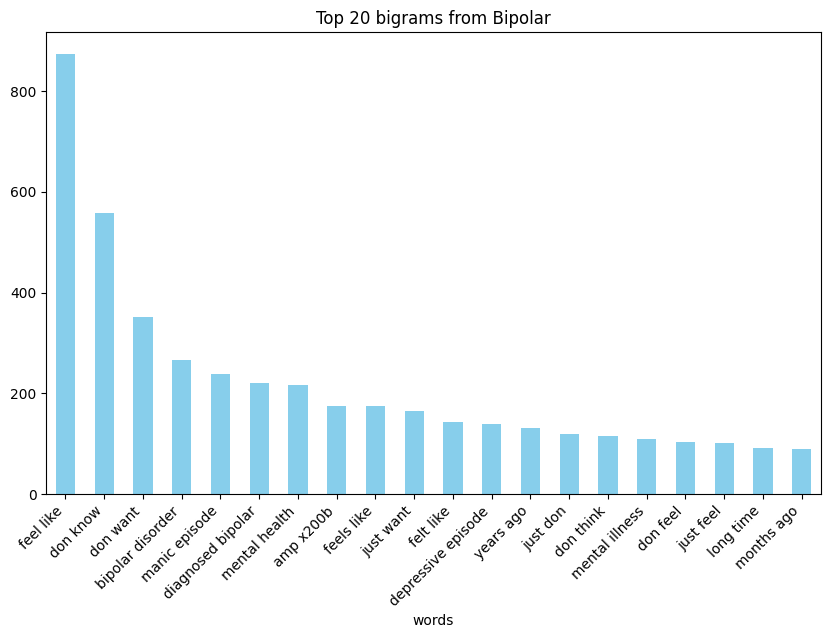

In [79]:
for x in Enfermedades_Sin_Normal:
    # Obtener los bigramas más comunes
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20, 2)
    
    # Crear un DataFrame con los bigramas y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por bigramas y ordenar por frecuencia
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    ax = df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 bigrams from {x}', 
        figsize=(10, 6),
        color='skyblue'
    )
    
    # Ajustar etiquetas del eje x para que no se sobrepongan
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Mostrar el gráfico
    plt.show()


Ahora el mismo ejercicio con trigramas

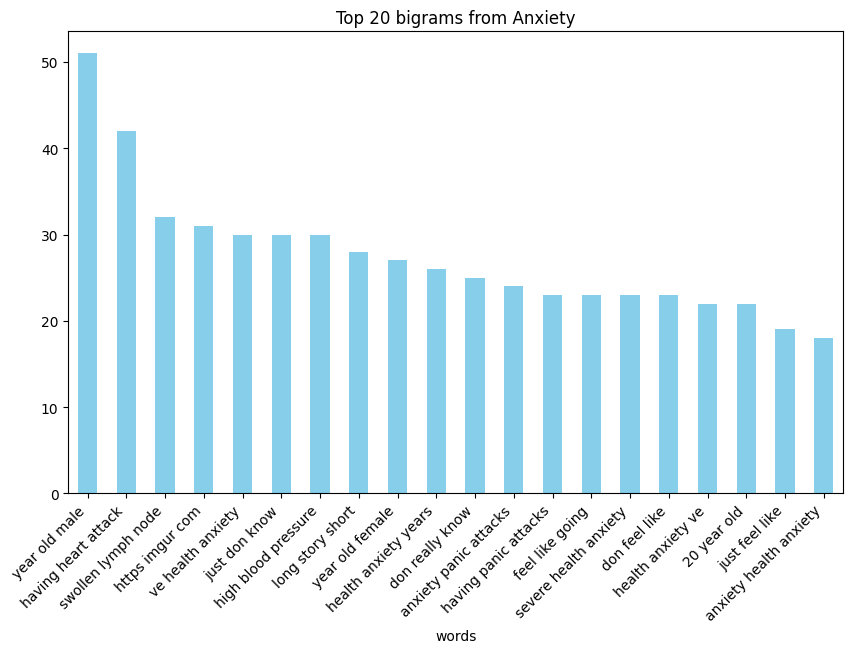

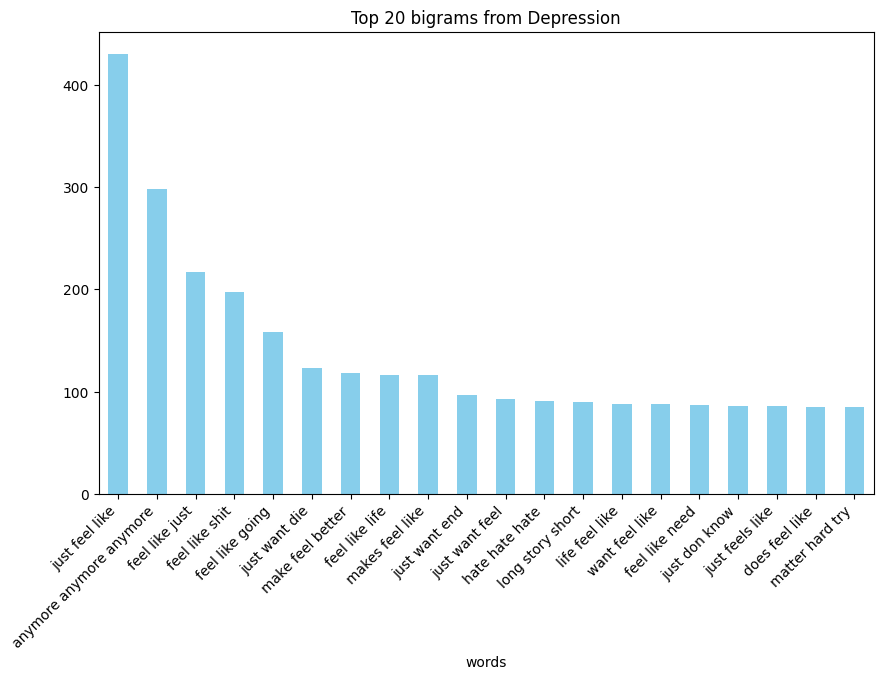

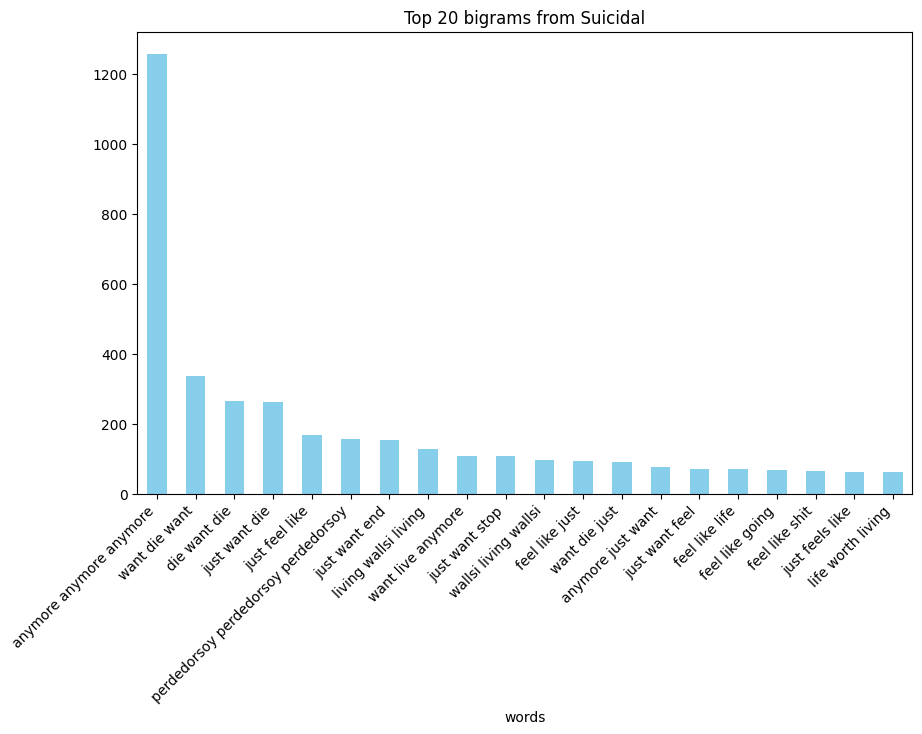

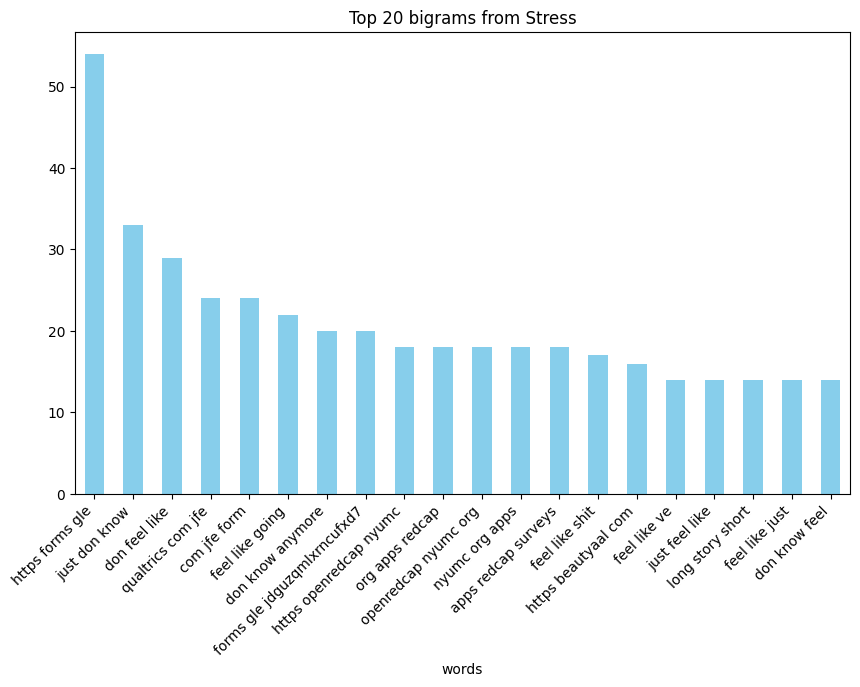

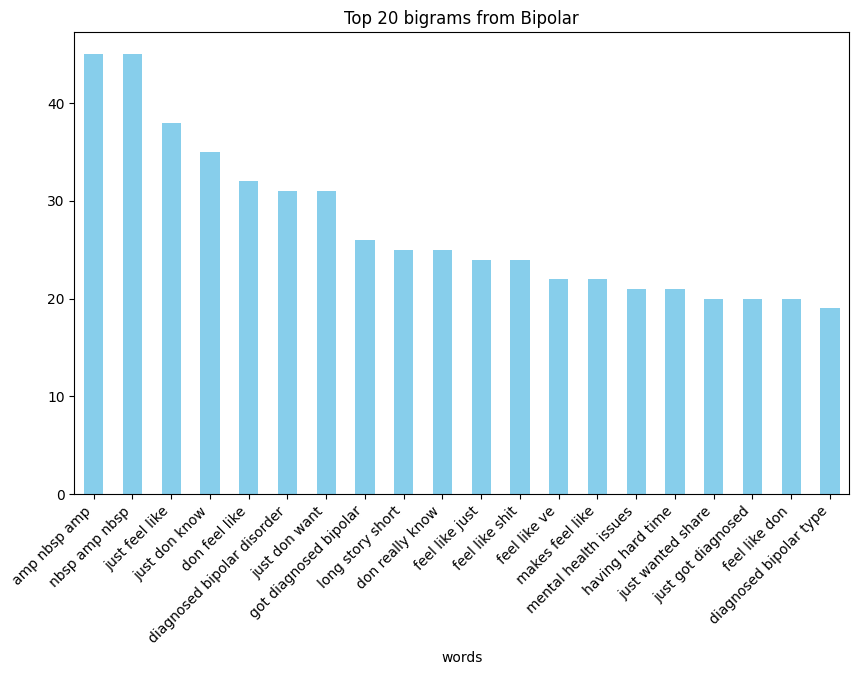

In [80]:
for x in Enfermedades_Sin_Normal:
    # Obtener los bigramas más comunes
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20, 3)
    
    # Crear un DataFrame con los bigramas y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por bigramas y ordenar por frecuencia
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    ax = df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 bigrams from {x}', 
        figsize=(10, 6),
        color='skyblue'
    )
    
    # Ajustar etiquetas del eje x para que no se sobrepongan
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Mostrar el gráfico
    plt.show()

# Conclusiones
Al analizar las 20 palabras más comunes no nos decian mucho, sin embargo al construir los bigramas y los trigramas si podemos ver claramente expresiones que nos pueden dar idea de como podemos clasificar una enfermedad mental

# Análsis de sentimientos

En esta sección, exploraremos si los sentimientos positivos, negativos o neutrales están asociados con cada una de las enfermedades mentales. El objetivo es determinar si existe una relación entre el tipo de sentimiento expresado y las enfermedades mentales clasificadas en nuestro conjunto de datos. Analizaremos los patrones y las correlaciones para identificar cualquier asociación significativa que pueda proporcionar información útil sobre la influencia de los sentimientos en la manifestación de estas enfermedades.

In [81]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [82]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jjmoras/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
sia=SentimentIntensityAnalyzer()

In [101]:
sia.polarity_scores(df["statement"].iloc[1000]) # nos devuelve las metricas de nltk

{'neg': 0.158, 'neu': 0.625, 'pos': 0.217, 'compound': 0.3404}

In [84]:
df["compound_score"] = df["statement"].apply(lambda texto: sia.polarity_scores(texto))

In [85]:
df.sample()

,statement,status,len,enfermo,compound_score
37654,"damn, what is this crazy life of mine",Suicidal,37,si,"{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'comp..."


In [86]:
df['compound_score'] = df['compound_score'].apply(lambda x: x['compound'])

In [87]:
def asignar_etiqueta(compound_score:float, limit_inf:float=-0.05, limit_sup:float=0.05):
    """_summary_
    Args:
    compound_score (_type_): description
    Returns:
    type: description
    """
    if compound_score >= limit_sup:
    
        return 'positivo'
    elif compound_score <= limit_inf:
        return 'negativo'
    else:
        return 'neutral'

In [88]:
df["sentiment_label"]=df["compound_score"].apply(asignar_etiqueta)

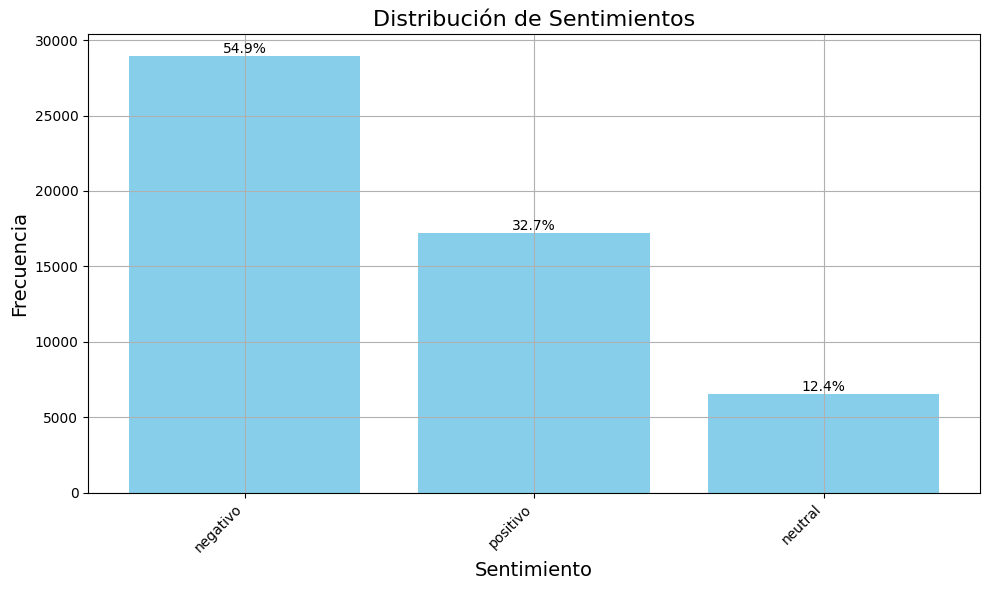

In [91]:


# Contar las frecuencias de cada categoría
frecuencias = df['sentiment_label'].value_counts()

# Calcular los porcentajes
porcentajes = (frecuencias / frecuencias.sum()) * 100

# Crear el histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
bars = plt.bar(frecuencias.index, frecuencias.values, color='skyblue')

# Agregar porcentajes sobre cada barra
for bar, porcentaje in zip(bars, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{porcentaje:.1f}%', ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Distribución de Sentimientos', fontsize=16)  # Título del gráfico
plt.xlabel('Sentimiento', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x
plt.grid(True)  # Agregar una cuadrícula para facilitar la lectura

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


In [93]:
import seaborn as sns

In [94]:
df.sample()

,statement,status,len,enfermo,compound_score,sentiment_label
20687,I am fucking sick of everything. I do not know...,Depression,1334,si,-0.9914,negativo


Ahora veremos por cada enfermedad como se distribuyen los sentimientos

/tmp/ipykernel_820/3229585984.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


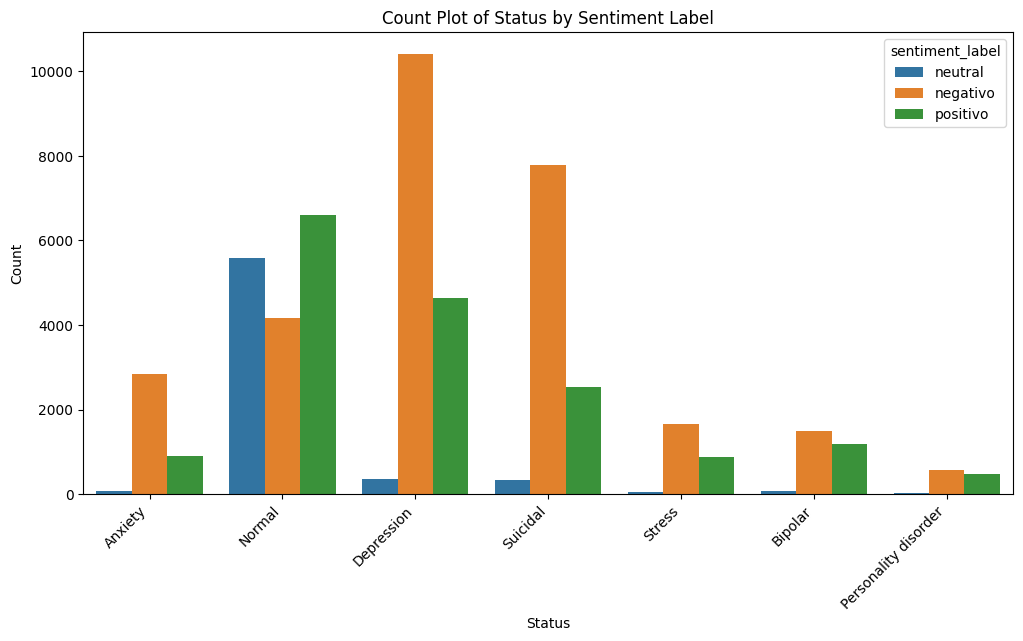

In [144]:


# Crear el gráfico de conteo
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según sea necesario
ax = sns.countplot(x="status", data=df, hue='sentiment_label')

# Ajustar la rotación y el alineamiento de las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Añadir etiquetas y título si es necesario
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count Plot of Status by Sentiment Label')

# Mostrar el gráfico
plt.show()


Claramente se ve que hay una en las enfermedades la mayor parte de los comentarios son negativos, mientras que lo comentarios normales la distribución de los sentimientos es más pareja

# Modelado Scypy

In [95]:
import spacy
from nltk.tokenize import word_tokenize

In [96]:
spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [97]:
nlp=spacy.load("en_core_web_sm")

Vamos a limpiar el texto

In [107]:
def limpiar_texto(texto):
    '''
    Función de limpiar texto lematizar, borrar stop words
    '''
    texto = texto.lower()
    doc = nlp(texto)
    texto_limpio = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return texto_limpio

In [108]:
df['clean_text'] = df['statement'].apply(limpiar_texto)

In [111]:
df.sample()

,statement,status,len,enfermo,compound_score,sentiment_label,clean_text
44134,fabianv what kind of doc and what are you usin...,Normal,92,No,0.0,neutral,fabianv kind doc write doc


# Tokenizacion

In [112]:
df["tokens"]=df["clean_text"].apply(word_tokenize)

In [113]:
df.head()

,statement,status,len,enfermo,compound_score,sentiment_label,clean_text,tokens
0,oh my gosh,Anxiety,10,si,0.0000,neutral,oh gosh,"[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,si,-0.7269,negativo,"trouble sleep , confused mind , restless heart...","[trouble, sleep, ,, confused, mind, ,, restles..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,si,-0.7351,negativo,"wrong , dear , forward doubt . stay restless r...","[wrong, ,, dear, ,, forward, doubt, ., stay, r..."
3,I've shifted my focus to something else but I'...,Anxiety,61,si,-0.4215,negativo,shift focus worried,"[shift, focus, worried]"
4,"I'm restless and restless, it's been a month n...",Anxiety,72,si,-0.4939,negativo,"restless restless , month , boy . mean ?","[restless, restless, ,, month, ,, boy, ., mean..."


In [114]:
df['tokens']

0                                               [oh, gosh]
1        [trouble, sleep, ,, confused, mind, ,, restles...
2        [wrong, ,, dear, ,, forward, doubt, ., stay, r...
3                                  [shift, focus, worried]
4        [restless, restless, ,, month, ,, boy, ., mean...
                               ...                        
53038    [take, seriously, (, 24, m, ), deal, depressio...
53039    [selfishness, ``, feel, good, ,, like, belong,...
53040    [way, sleep, well, ?, sleep, night, ,, med, he...
53041    [public, speak, tip, ?, hi, ,, ., presentation...
53042    [bad, door, anxiety, !, scared, lock, door, ,,...
Name: tokens, Length: 52681, dtype: object

Vamos a crear la columna df['joined_tokens'] para dejar los tokens en modo str para volver a hacer el análisis de las palabras mas repetidad por enfermedad

In [115]:
df['joined_tokens'] = df['tokens'].apply(lambda tokens: ' '.join(filter(None, tokens)))
common_words = get_top_n_words(df['joined_tokens'], 20, 2)
print(common_words)

[('feel like', 16077), ('want die', 2518), ('year old', 1938), ('mental health', 1840), ('year ago', 1635), ('anymore anymore', 1578), ('panic attack', 1315), ('feel bad', 1225), ('make feel', 1154), ('good friend', 1131), ('amp x200b', 1082), ('long time', 1076), ('month ago', 1071), ('want live', 1066), ('need help', 992), ('high school', 979), ('feel way', 959), ('suicidal thought', 925), ('want kill', 878), ('want feel', 871)]


De nuevo, podemos ver los histogramas de palabras mas frecuentes despues de haber limpiado y tokenizado el statement

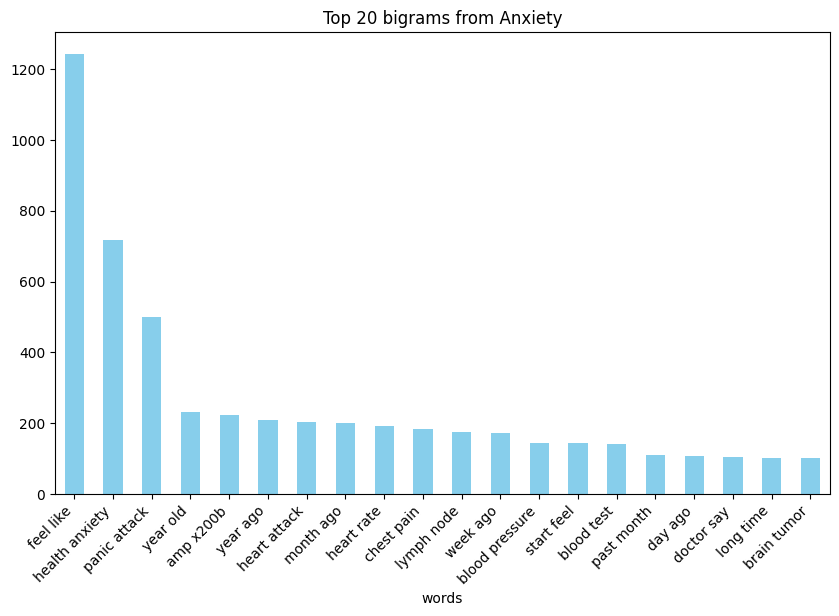

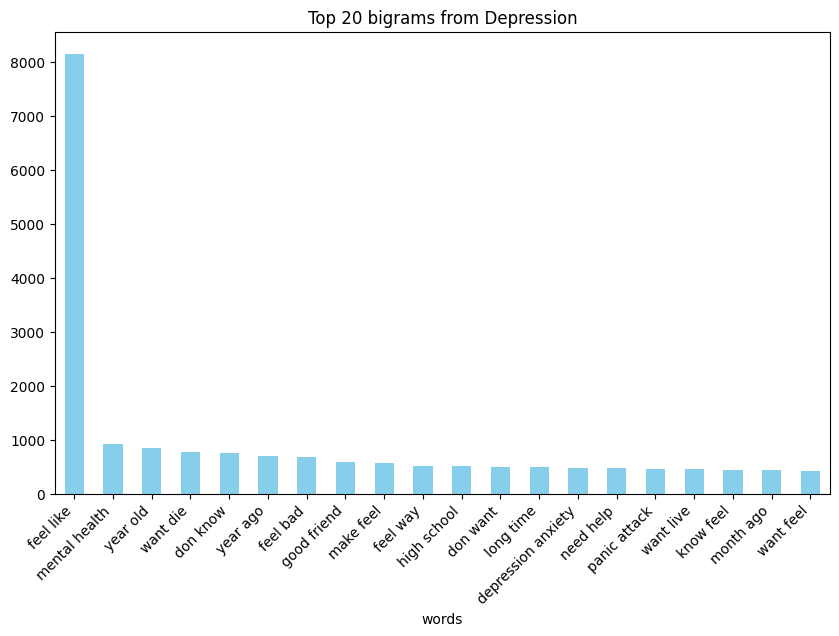

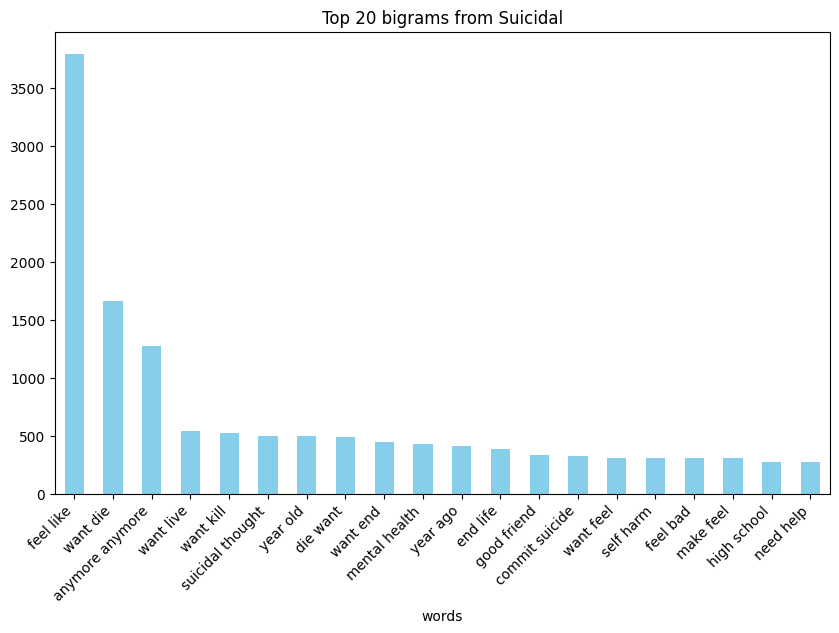

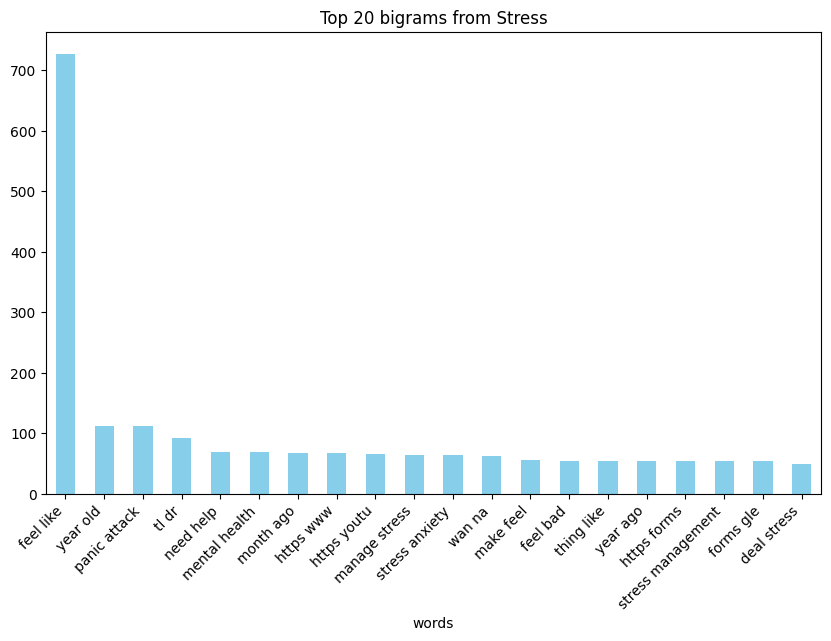

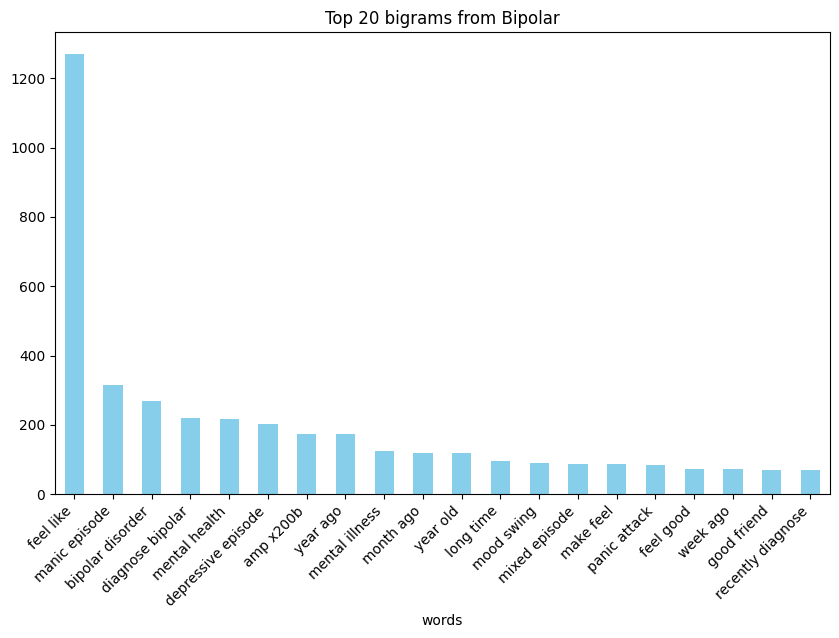

In [117]:
for x in Enfermedades_Sin_Normal:
    # Obtener los bigramas más comunes
    common_words = get_top_n_words(df[df['status'] == x]['joined_tokens'], 20, 2)
    
    # Crear un DataFrame con los bigramas y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por bigramas y ordenar por frecuencia
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    ax = df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 bigrams from {x}', 
        figsize=(10, 6),
        color='skyblue'
    )
    
    # Ajustar etiquetas del eje x para que no se sobrepongan
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Mostrar el gráfico
    plt.show()


Al comparar estos histogramas con los de los mensajes sin tokenizar, observamos que las expresiones se vuelven más claras y descriptivas para cada enfermedad. La tokenización ayuda a resaltar patrones y términos específicos que pueden ofrecer una mejor comprensión y caracterización de las enfermedades analizadas.

# Vectorización

In [118]:
df["vector"]=df['clean_text'].apply(lambda x:nlp(x).vector)    ### Vamos a vectorizar los tokens

In [119]:
df.sample()

,statement,status,len,enfermo,compound_score,sentiment_label,clean_text,tokens,joined_tokens,vector
29617,I'm assuming I have PTSD and my work gave me a...,Stress,317,si,-0.8324,negativo,assume ptsd work give number debate . hate ask...,"[assume, ptsd, work, give, number, debate, ., ...",assume ptsd work give number debate . hate ask...,"[-0.24142244, -0.8752677, 0.3373655, -0.027691..."


In [120]:
vector_dim=df['vector'].apply(lambda x: len(x))
print(vector_dim.unique())

[96  0]


Vamos a filtrar el dataset unicamente con las filas donde el vector dim no sea 0 

In [121]:
df["len"]=df["vector"].apply(len)

In [122]:
df=df.loc[(df["len"]==96)]

In [123]:
df.shape

(52651, 10)

In [124]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['labels_encoded']=label_encoder.fit_transform(df['enfermo'])

In [125]:
df.sample()

,statement,status,len,enfermo,compound_score,sentiment_label,clean_text,tokens,joined_tokens,vector,labels_encoded
12896,"what is the point on life, right? I am a horri...",Depression,96,si,-0.9217,negativo,"point life , right ? horrible sibling , child ...","[point, life, ,, right, ?, horrible, sibling, ...","point life , right ? horrible sibling , child ...","[-0.13122083, -0.5105553, -0.10384788, -0.1616...",1


Labels_encoded: enfermo. si:1 no:0

In [126]:
def vectors_to_np_array(vectors):
    '''
    Funcion para convertir vectores en numpy arrays
    '''
    array_vectors=np.array([np.array(vec) for vec in vectors])
    return array_vectors

In [312]:
X=vectors_to_np_array(df['vector'].values)

In [313]:
y=df['labels_encoded'].values

In [134]:
df['labels_encoded'].unique()

array([1, 0])

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression(max_iter=1000)
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [137]:
y_pred=modelo.predict(X_test)

In [138]:

from sklearn.metrics import accuracy_score, classification_report

# Supongamos que ya tienes las variables y_test y y_pred
# y_test: Etiquetas verdaderas de los datos de prueba
# y_pred: Etiquetas predichas por el modelo

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy}")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.8783869334008609
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      4991
           1       0.88      0.95      0.91     10805

    accuracy                           0.88     15796
   macro avg       0.87      0.84      0.85     15796
weighted avg       0.88      0.88      0.88     15796



In [139]:
df.sample()

,statement,status,len,enfermo,compound_score,sentiment_label,clean_text,tokens,joined_tokens,vector,labels_encoded
24615,**I just want to go away forever I cannot deal...,Suicidal,96,si,0.0772,positivo,* * want away forever deal life anymore * * life,"[*, *, want, away, forever, deal, life, anymor...",* * want away forever deal life anymore * * life,"[0.1451032, -0.44533917, -0.1282836, -0.083035...",1


# Redes  Neuronales

In [140]:
import tensorflow as tf

In [141]:
X.shape

(52651, 96)

In [142]:
y.shape

(52651,)

# Modelo Simple

In [143]:


model = tf.keras.Sequential([
    tf.keras.Input(shape=(96,)),  # Forma de entrada, 96 características
    tf.keras.layers.Dense(units=64, activation='relu'),  # Capa oculta con activación ReLU
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida para clasificación binaria
])




In [144]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,273 (24.50 KB)

 Trainable params: 6,273 (24.50 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:

# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8466 - loss: 0.3704 - val_accuracy: 0.8790 - val_loss: 0.2964
Epoch 2/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8848 - loss: 0.2830 - val_accuracy: 0.8898 - val_loss: 0.2761
Epoch 3/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8932 - loss: 0.2673 - val_accuracy: 0.8913 - val_loss: 0.2690
Epoch 4/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8953 - loss: 0.2558 - val_accuracy: 0.8911 - val_loss: 0.2666
Epoch 5/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8971 - loss: 0.2554 - val_accuracy: 0.8932 - val_loss: 0.2668
Epoch 6/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8999 - loss: 0.2494 - val_accuracy: 0.8947 - val_loss: 0.2599
Epoch 7/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9034 - loss: 0.2430 - val_accuracy: 0.8939 - val_loss: 0.2638
Epoch 8/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9039 - loss: 0.2396 - val_accuracy: 0.

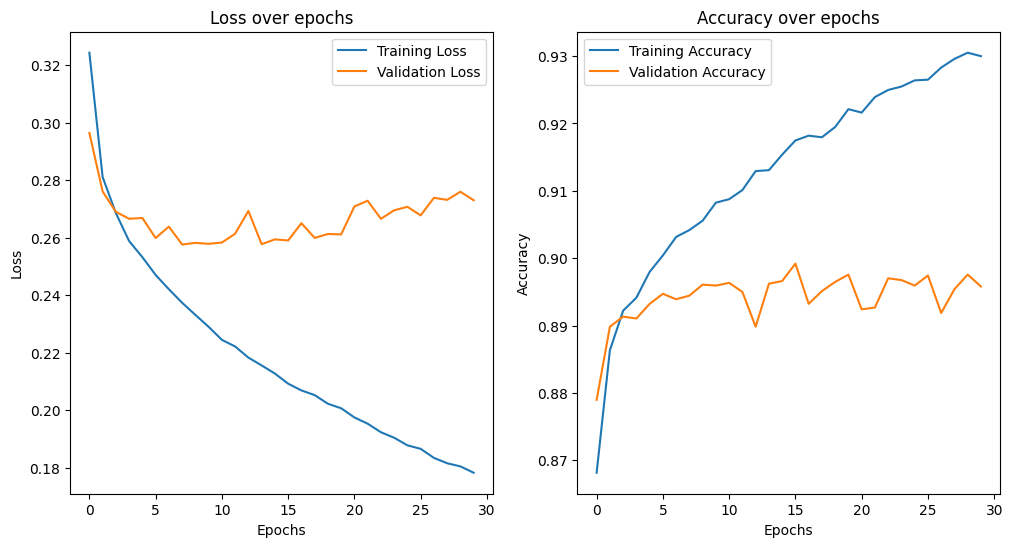

In [148]:

# Graficar la pérdida (loss)
plt.figure(figsize=(12, 6))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

El modelo está overfitting los datos de entrenamiento. Esto es evidente porque la pérdida de validación es significativamente más alta que la pérdida de entrenamiento, y la precisión de validación no mejora significativamente a lo largo del tiempo. Para reducir el overfitting, se harán las siguientes acciones:
Regularización: Añadir regularización (L2 o L1) en las capas densas.
Dropout: Incorporar capas de dropout para reducir la dependencia en características específicas.

In [306]:
from tensorflow.keras import regularizers  # Importar regularizers
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.Input(shape=(96,)),
    tf.keras.layers.Dense(units=64, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),  # Añadir Dropout con 50% de probabilidad
    tf.keras.layers.Dense(units=32, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),  # Añadir Dropout en la segunda capa también
     
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Salida binaria
])


In [307]:
# Compilar el modelo

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8101 - loss: 0.9323 - val_accuracy: 0.8803 - val_loss: 0.3765
Epoch 2/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8691 - loss: 0.3992 - val_accuracy: 0.8797 - val_loss: 0.3560
Epoch 3/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.3850 - val_accuracy: 0.8839 - val_loss: 0.3473
Epoch 4/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8702 - loss: 0.3779 - val_accuracy: 0.8829 - val_loss: 0.3487
Epoch 5/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8733 - loss: 0.3702 - val_accuracy: 0.8817 - val_loss: 0.3446
Epoch 6/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8759 - loss: 0.3657 - val_accuracy: 0.8818 - val_loss: 0.3424
Epoch 7/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8781 - loss: 0.3614 - val_accuracy: 0.8863 - val_loss: 0.3385
Epoch 8/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8688 - loss: 0.3687 - val_accuracy: 0.

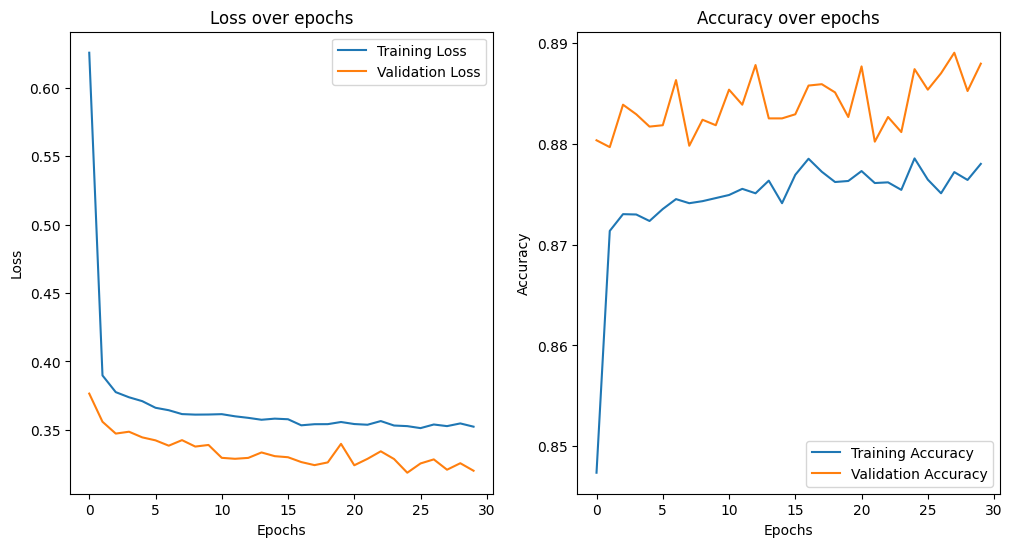

In [308]:
# Graficar la pérdida (loss)
plt.figure(figsize=(12, 6))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Loss (pérdida):

La pérdida de entrenamiento sigue disminuyendo gradualmente a lo largo de las épocas, lo cual es una buena señal.
La pérdida de validación también disminuye, lo que indica que el modelo no está sobreajustando significativamente, pero tiene variaciones menores.
Accuracy (precisión):

La precisión de validación fluctúa a lo largo de las épocas. Esto podría deberse a pequeños cambios en los datos de validación o a la naturaleza estocástica del entrenamiento. Aun así, parece que no hay una gran brecha entre la precisión de entrenamiento y validación.
La precisión de entrenamiento es constante y está mejorando gradualmente, lo cual indica que el modelo sigue aprendiendo.

In [309]:
y_pred=model.predict(X_test)

494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


In [310]:
# Obtener predicciones como probabilidades
y_pred_prob = model.predict(X_test)

# Convertir probabilidades en clasificaciones binarias (umbral = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

print(y_pred)  # Esto imprimirá las predicciones binarias (0 o 1)


494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [311]:
# Supongamos que ya tienes las variables y_test y y_pred
# y_test: Etiquetas verdaderas de los datos de prueba
# y_pred: Etiquetas predichas por el modelo

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy}")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

Accuracy: 0.884907571537098
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4991
           1       0.92      0.92      0.92     10805

    accuracy                           0.88     15796
   macro avg       0.87      0.87      0.87     15796
weighted avg       0.88      0.88      0.88     15796



De acuerdo a estos resultados comparamos el primer modelo con el segundo de la siguiente forma: 
Ventajas del Primer Modelo:

Mejor Precision para la clase 0.
Mejor rendimiento en F1-score para la clase 1.
Ventajas del Segundo Modelo:

Mayor Accuracy general.
Mejor Recall para la clase 0.
Mejor rendimiento equilibrado en Precision y Recall para la clase 1.

Vamos a ver si podemos cambiar un poco más el modelo a ver si mejora

In [328]:

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.Input(shape=(96,)),  # Capa de entrada
    tf.keras.layers.Dense(256, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Salida binaria
])


In [329]:
# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8495 - loss: 1.0205 - val_accuracy: 0.8810 - val_loss: 0.3750
Epoch 2/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8762 - loss: 0.3528 - val_accuracy: 0.8749 - val_loss: 0.3402
Epoch 3/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8772 - loss: 0.3357 - val_accuracy: 0.8843 - val_loss: 0.3236
Epoch 4/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8833 - loss: 0.3267 - val_accuracy: 0.8869 - val_loss: 0.3245
Epoch 5/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8841 - loss: 0.3213 - val_accuracy: 0.8867 - val_loss: 0.3169
Epoch 6/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8826 - loss: 0.3181 - val_accuracy: 0.8806 - val_loss: 0.3198
Epoch 7/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8845 - loss: 0.3123 - val_accuracy: 0.8862 - val_loss: 0.3092
Epoch 8/30
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.3130 - val_accuracy: 0.

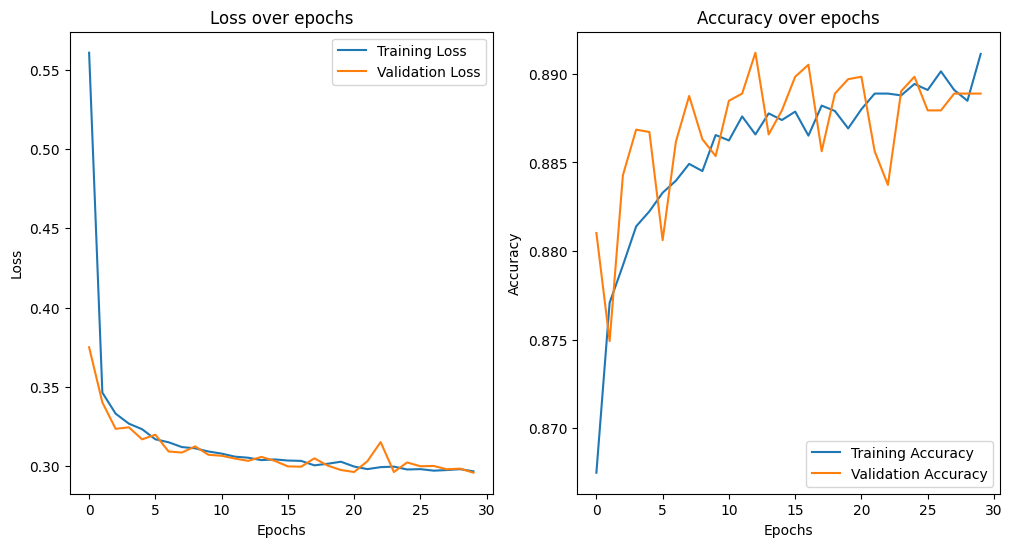

In [330]:
# Graficar la pérdida (loss)
plt.figure(figsize=(12, 6))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [318]:
y_pred=model.predict(X_test)
# Obtener predicciones como probabilidades
y_pred_prob = model.predict(X_test)

# Convertir probabilidades en clasificaciones binarias (umbral = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

print(y_pred)  # Esto imprimirá las predicciones binarias (0 o 1)
# Supongamos que ya tienes las variables y_test y y_pred
# y_test: Etiquetas verdaderas de los datos de prueba
# y_pred: Etiquetas predichas por el modelo

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy}")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.8880729298556597
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4991
           1       0.92      0.92      0.92     10805

    accuracy                           0.89     15796
   macro avg       0.87      0.87      0.87     15796
weighted avg       0.89      0.89      0.89     15796



Este nuevo modelo mejora el anterior. Tiene mejor poder de predicción en ambas categorías. 

# Predicción enfermedad

In [149]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [150]:
df['labels_enfermedad']=label_encoder.fit_transform(df['status'])

In [151]:
df['labels_enfermedad'].unique()

array([0, 3, 2, 6, 5, 1, 4])

In [152]:
# Iterar sobre cada valor único en 'labels_enfermedad'
for x in df['labels_enfermedad'].unique():
    # Obtener la enfermedad correspondiente al label_enfermedad
    enf = df[df['labels_enfermedad'] == x]['status'].unique()
    
    # Imprimir la relación entre el label_enfermedad y la enfermedad
    print(f'El label_enfermedad {x} corresponde a la enfermedad: {", ".join(enf)}')


El label_enfermedad 0 corresponde a la enfermedad: Anxiety
El label_enfermedad 3 corresponde a la enfermedad: Normal
El label_enfermedad 2 corresponde a la enfermedad: Depression
El label_enfermedad 6 corresponde a la enfermedad: Suicidal
El label_enfermedad 5 corresponde a la enfermedad: Stress
El label_enfermedad 1 corresponde a la enfermedad: Bipolar
El label_enfermedad 4 corresponde a la enfermedad: Personality disorder


In [182]:
df.status.value_counts()

status
Normal                  16319
Depression              15400
Suicidal                10651
Anxiety                  3840
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [331]:
y=df['labels_enfermedad'].values


In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [369]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.Input(shape=(96,)),  # Capa de entrada
    tf.keras.layers.Dense(256, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(7, activation='softmax')  # Capa de salida
])


In [370]:
# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2, 
                    #callbacks=[early_stopping]
                    )

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4980 - loss: 2.4232 - val_accuracy: 0.5438 - val_loss: 1.3187
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5499 - loss: 1.2753 - val_accuracy: 0.5539 - val_loss: 1.2550
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5535 - loss: 1.2284 - val_accuracy: 0.5565 - val_loss: 1.2241
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5612 - loss: 1.2142 - val_accuracy: 0.5580 - val_loss: 1.2331
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5609 - loss: 1.2025 - val_accuracy: 0.5633 - val_loss: 1.1998
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5690 - loss: 1.1842 - val_accuracy: 0.5564 - val_loss: 1.1854
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5726 - loss: 1.1809 - val_accuracy: 0.5550 - val_loss: 1.1842
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5757 - loss: 1.1682 - val_accu

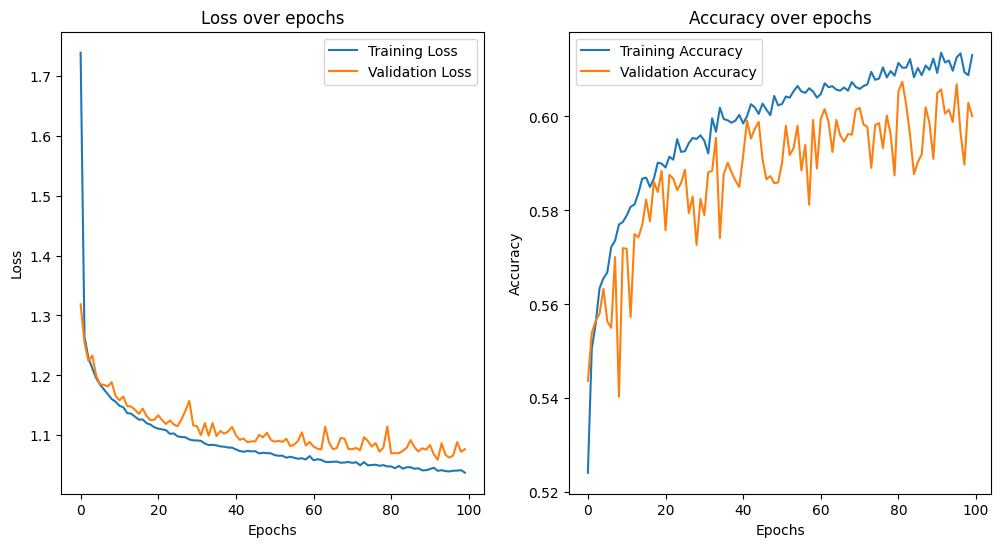

In [371]:
# Graficar la pérdida (loss)
plt.figure(figsize=(12, 6))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [372]:
y_pred_prob=model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(f"Accuracy: {accuracy}")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.6060395036718157
              precision    recall  f1-score   support

           0       0.37      0.55      0.44      1119
           1       0.37      0.33      0.35       834
           2       0.56      0.72      0.63      4601
           3       0.80      0.86      0.83      4991
           4       0.80      0.01      0.02       326
           5       0.29      0.07      0.11       789
           6       0.55      0.33      0.41      3136

    accuracy                           0.61     15796
   macro avg       0.53      0.41      0.40     15796
weighted avg       0.60      0.61      0.58     15796



# Conclusiones:
Precisión General: La precisión general del modelo es del 61%, lo que indica un rendimiento moderado en la clasificación. Hay espacio para mejoras en términos de precisión y en el manejo de clases desbalanceadas.

Desempeño por Clase:

Clase 0: Tiene una precisión de 0.37, recall de 0.55, y un f1-score de 0.44. Esto indica que el modelo tiene un rendimiento razonable en esta clase, con una buena capacidad para identificar ejemplos de la clase, aunque la precisión es baja.
Clase 1: Tiene una precisión de 0.37, recall de 0.33, y un f1-score de 0.35. El rendimiento en esta clase es bajo en comparación con otras, con precisión y recall similares.

Clase 2: Tiene una precisión de 0.56, recall de 0.72, y un f1-score de 0.63. Esta es una de las mejores clases en cuanto a desempeño, mostrando un buen equilibrio entre precisión y recall.

Clase 3: Tiene una precisión de 0.80, recall de 0.86, y un f1-score de 0.83. Es la mejor clase en términos de precisión y recall, indicando que el modelo clasifica muy bien esta clase.

Clase 4: Tiene una precisión de 0.80, pero un recall extremadamente bajo de 0.01, y un f1-score de 0.02. Esto indica que el modelo tiene problemas significativos para identificar ejemplos de esta clase. Puede ser un problema de desbalance de clases.

Clase 5: Tiene una precisión de 0.29, recall de 0.07, y un f1-score de 0.11. El modelo tiene un bajo desempeño en esta clase.

Clase 6: Tiene una precisión de 0.55, recall de 0.33, y un f1-score de 0.41. Aunque tiene una precisión aceptable, el recall es bajo, sugiriendo que el modelo no está detectando todos los ejemplos de esta clase.

Promedios:

Macro Average: El promedio macro de precisión es 0.53, recall es 0.41, y f1-score es 0.40. Este promedio muestra que, en general, el modelo tiene dificultades para manejar todas las clases por igual.

Weighted Average: El promedio ponderado de precisión es 0.60, recall es 0.61, y f1-score es 0.58. Estos valores reflejan un desempeño relativamente mejor, teniendo en cuenta el soporte (cantidad de ejemplos) de cada clase.


# Probando Hiperparámetros

1) Tasa de aprendizaje

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Pérdida (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Precisión (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6141 - loss: 1.0290 - val_accuracy: 0.6056 - val_loss: 1.0643
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6138 - loss: 1.0331 - val_accuracy: 0.6013 - val_loss: 1.0726
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6068 - loss: 1.0440 - val_accuracy: 0.6049 - val_loss: 1.0618
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6167 - loss: 1.0280 - val_accuracy: 0.6048 - val_loss: 1.0619
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6146 - loss: 1.0308 - val_accuracy: 0.6013 - val_loss: 1.0692
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6198 - loss: 1.0357 - val_accuracy: 0.6022 - val_loss: 1.0729
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6109 - loss: 1.0417 - val_accuracy: 0.6074 - val_loss: 1.0595
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6168 - loss: 1.0328 - val_accu

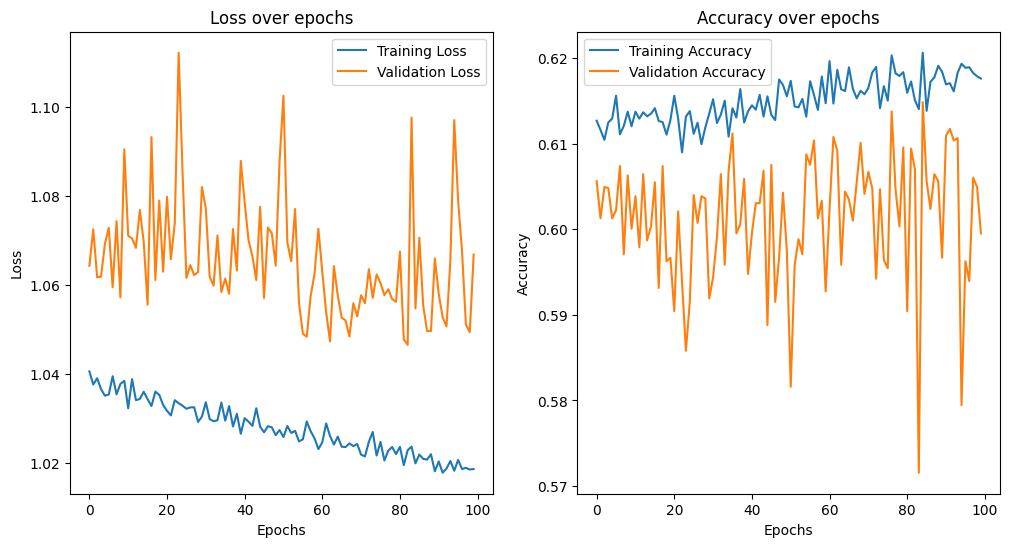

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5245 - loss: 1.3877 - val_accuracy: 0.5621 - val_loss: 1.2218
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5524 - loss: 1.2002 - val_accuracy: 0.5329 - val_loss: 1.2231
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5543 - loss: 1.1916 - val_accuracy: 0.5632 - val_loss: 1.1668
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5571 - loss: 1.1845 - val_accuracy: 0.5457 - val_loss: 1.2284
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5522 - loss: 1.1869 - val_accuracy: 0.5438 - val_loss: 1.1952
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5509 - loss: 1.1851 - val_accuracy: 0.5446 - val_loss: 1.1776
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5558 - loss: 1.1665 - val_accuracy: 0.5427 - val_loss: 1.1893
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5483 - loss: 1.1825 - val_accu

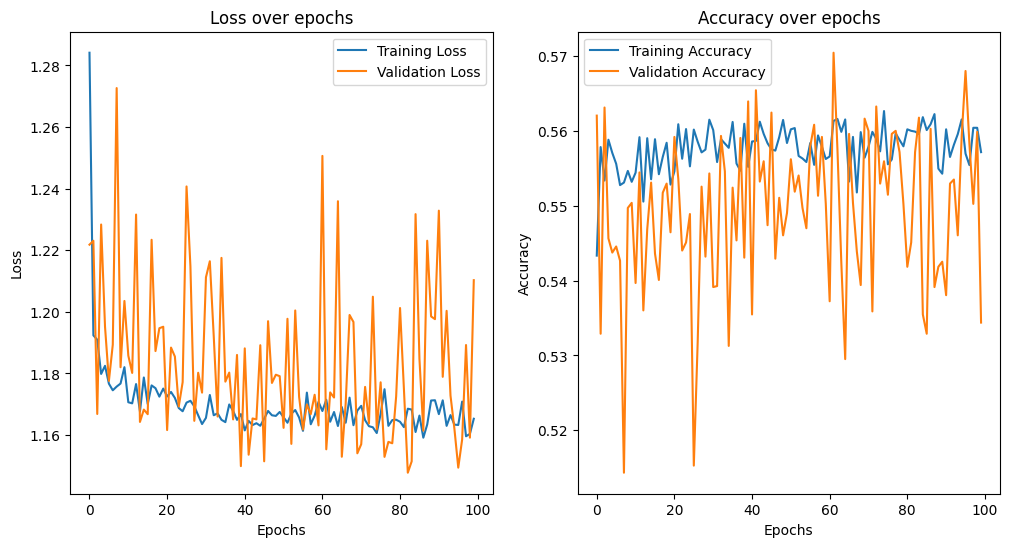

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4449 - loss: 3.5612 - val_accuracy: 0.4720 - val_loss: 1.4769
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4934 - loss: 1.4658 - val_accuracy: 0.5112 - val_loss: 1.4363
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4976 - loss: 1.4684 - val_accuracy: 0.5006 - val_loss: 1.4118
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4928 - loss: 1.4377 - val_accuracy: 0.4723 - val_loss: 1.4830
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4982 - loss: 1.4425 - val_accuracy: 0.5131 - val_loss: 1.4051
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4989 - loss: 1.4312 - val_accuracy: 0.4816 - val_loss: 1.5326
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4940 - loss: 1.4466 - val_accuracy: 0.5071 - val_loss: 1.4105
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4985 - loss: 1.4354 - val_accu

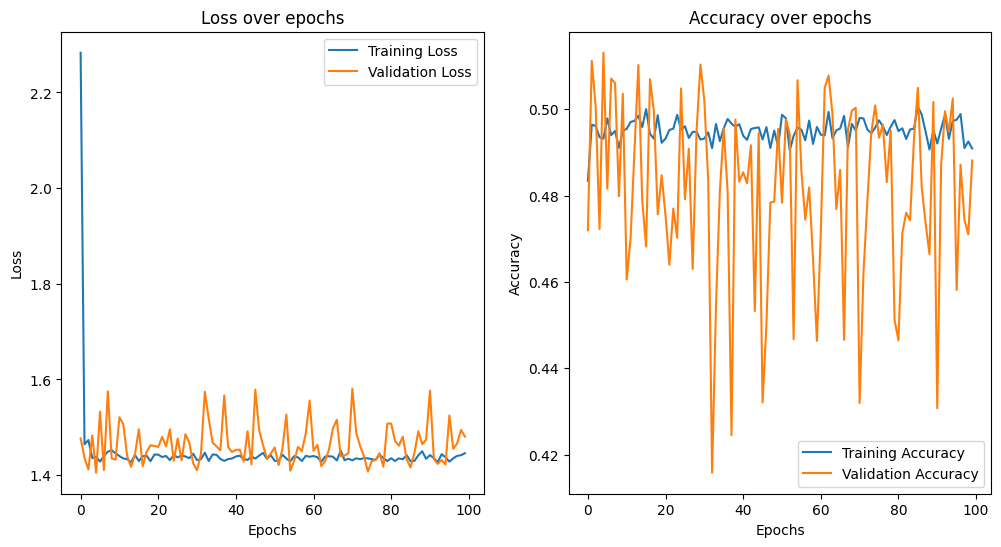

In [373]:
# Ejemplo con Adam Optimizer y diferentes tasas de aprendizaje
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Entrenamiento del modelo y evaluación
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2, 
                    #callbacks=[early_stopping]
                    )
    plot_history(history)


Probando Numero de Neuronas

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3900 - loss: 2.5539 - val_accuracy: 0.5249 - val_loss: 1.3803
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5173 - loss: 1.3907 - val_accuracy: 0.5311 - val_loss: 1.3077
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5300 - loss: 1.3139 - val_accuracy: 0.5401 - val_loss: 1.2765
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5365 - loss: 1.3063 - val_accuracy: 0.5538 - val_loss: 1.2506
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5359 - loss: 1.2902 - val_accuracy: 0.5465 - val_loss: 1.2475
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5413 - loss: 1.2732 - val_accuracy: 0.5360 - val_loss: 1.2554
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5472 - loss: 1.2685 - val_accuracy: 0.5477 - val_loss: 1.2307
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5435 - loss: 1.2762 - val_accu

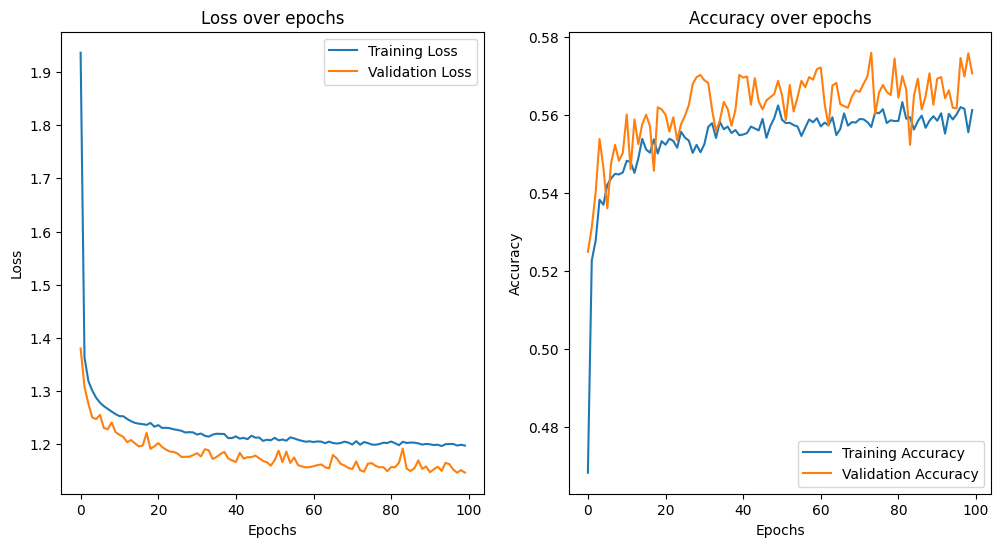

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4622 - loss: 2.7190 - val_accuracy: 0.5431 - val_loss: 1.3497
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5270 - loss: 1.3459 - val_accuracy: 0.5332 - val_loss: 1.2912
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5413 - loss: 1.3065 - val_accuracy: 0.5306 - val_loss: 1.2945
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5419 - loss: 1.2799 - val_accuracy: 0.5481 - val_loss: 1.2487
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5456 - loss: 1.2777 - val_accuracy: 0.5493 - val_loss: 1.2509
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5432 - loss: 1.2697 - val_accuracy: 0.5600 - val_loss: 1.2397
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5545 - loss: 1.2519 - val_accuracy: 0.5629 - val_loss: 1.2304
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5518 - loss: 1.2565 - val_accu

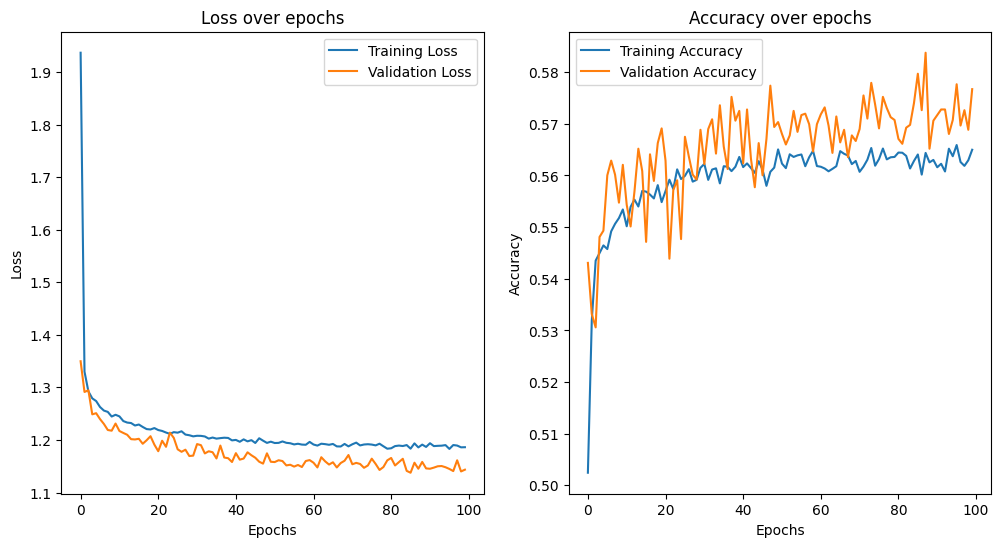

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4882 - loss: 2.9335 - val_accuracy: 0.5310 - val_loss: 1.3281
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5343 - loss: 1.3331 - val_accuracy: 0.5376 - val_loss: 1.2842
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5447 - loss: 1.2964 - val_accuracy: 0.5584 - val_loss: 1.2728
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5492 - loss: 1.2811 - val_accuracy: 0.5474 - val_loss: 1.2565
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5439 - loss: 1.2756 - val_accuracy: 0.5440 - val_loss: 1.2500
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5458 - loss: 1.2710 - val_accuracy: 0.5573 - val_loss: 1.2327
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5567 - loss: 1.2483 - val_accuracy: 0.5505 - val_loss: 1.2322
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5489 - loss: 1.2497 - val_accu

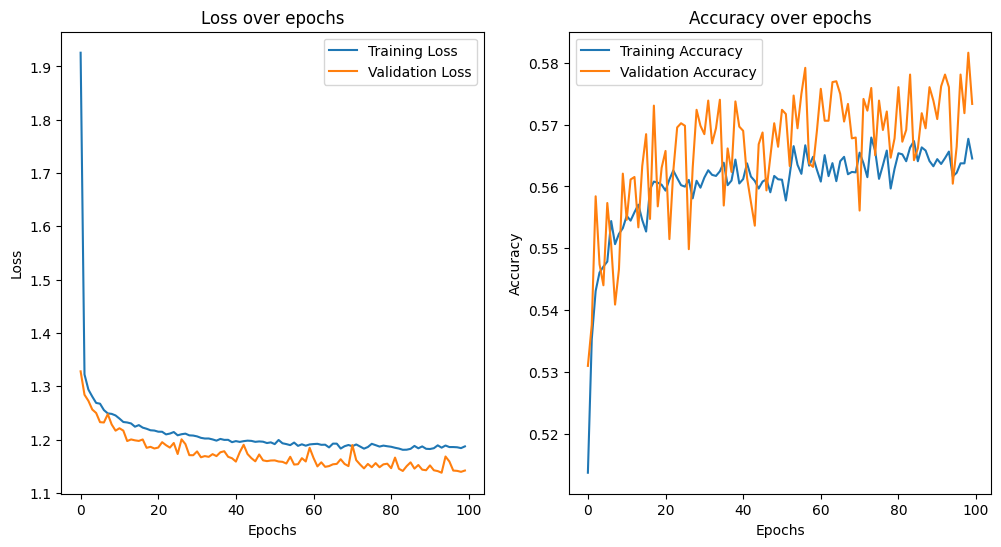

In [374]:
# Ejemplo con diferentes números de neuronas y capas
units = [128, 256, 512]

for unit in units:
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(96,)),
        tf.keras.layers.Dense(unit, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        tf.keras.layers.Dense(unit // 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Entrenamiento del modelo y evaluación
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2, 
                    #callbacks=[early_stopping]
                    )
    plot_history(history)


Probando funciones de activación

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5189 - loss: 1.2694 - val_accuracy: 0.5828 - val_loss: 1.0549
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5992 - loss: 1.0232 - val_accuracy: 0.5954 - val_loss: 1.0104
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6163 - loss: 0.9572 - val_accuracy: 0.6055 - val_loss: 0.9778
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6292 - loss: 0.9267 - val_accuracy: 0.6056 - val_loss: 0.9743
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6388 - loss: 0.8910 - val_accuracy: 0.6211 - val_loss: 0.9600
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6436 - loss: 0.8854 - val_accuracy: 0.6245 - val_loss: 0.9492
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6512 - loss: 0.8559 - val_accuracy: 0.6205 - val_loss: 0.9432
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6605 - loss: 0.8348 - val_accu

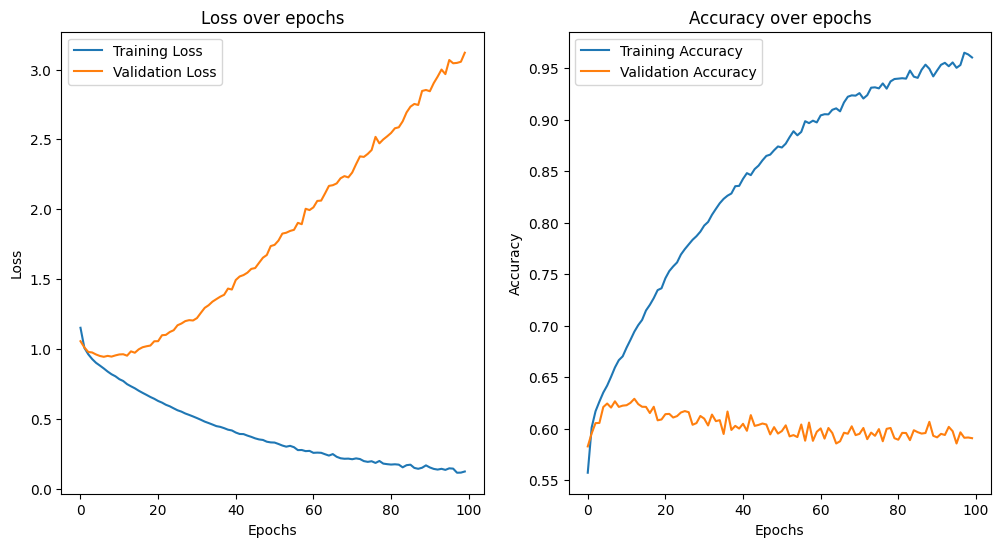

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5161 - loss: 1.2467 - val_accuracy: 0.5838 - val_loss: 1.0968
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5773 - loss: 1.0922 - val_accuracy: 0.5919 - val_loss: 1.0607
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5876 - loss: 1.0405 - val_accuracy: 0.5789 - val_loss: 1.0340
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5923 - loss: 1.0224 - val_accuracy: 0.6043 - val_loss: 1.0150
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6074 - loss: 0.9871 - val_accuracy: 0.5953 - val_loss: 1.0004
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6128 - loss: 0.9664 - val_accuracy: 0.6102 - val_loss: 0.9827
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6183 - loss: 0.9566 - val_accuracy: 0.6001 - val_loss: 0.9932
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6205 - loss: 0.9452 - val_accu

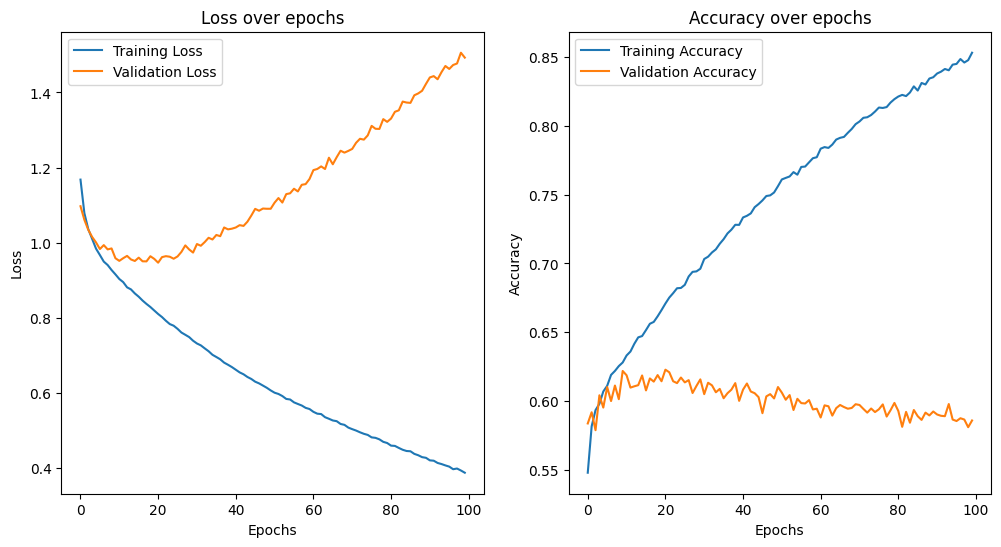

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4244 - loss: 1.5117 - val_accuracy: 0.5398 - val_loss: 1.2204
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5446 - loss: 1.1920 - val_accuracy: 0.5579 - val_loss: 1.1686
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5572 - loss: 1.1344 - val_accuracy: 0.5528 - val_loss: 1.1233
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5732 - loss: 1.1005 - val_accuracy: 0.5767 - val_loss: 1.0928
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5778 - loss: 1.0736 - val_accuracy: 0.5737 - val_loss: 1.0839
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5817 - loss: 1.0739 - val_accuracy: 0.5835 - val_loss: 1.0674
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5833 - loss: 1.0569 - val_accuracy: 0.5845 - val_loss: 1.0636
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5886 - loss: 1.0426 - val_accu

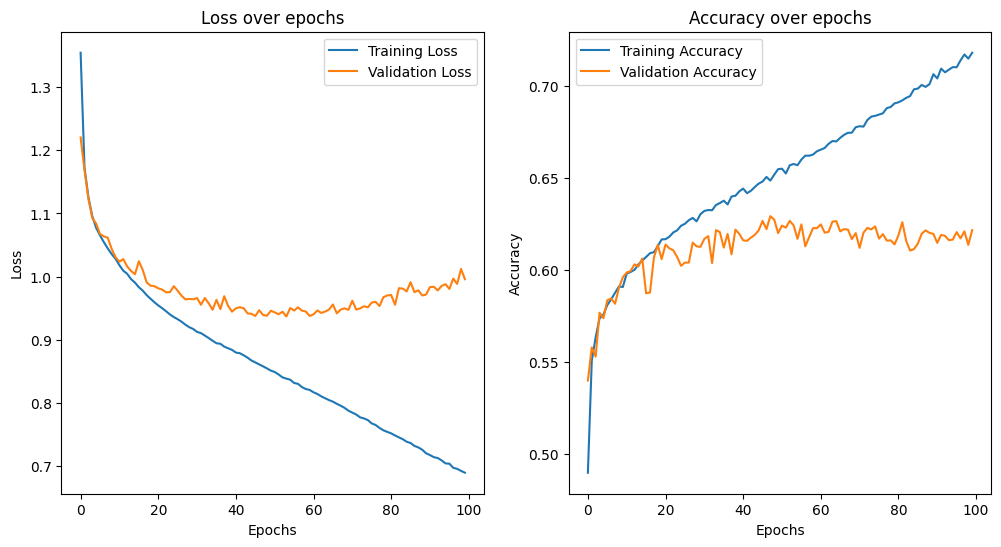

In [375]:
from tensorflow.keras.layers import LeakyReLU

activation_functions = ['relu', 'tanh', 'sigmoid']

for act_func in activation_functions:
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(96,)),
        tf.keras.layers.Dense(256),
        tf.keras.layers.Activation(act_func),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation(act_func),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Entrenamiento del modelo y evaluación
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2, 
                    #callbacks=[early_stopping]
                    )
    plot_history(history)




Probando Tasa de dropout

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.4831 - loss: 2.5507 - val_accuracy: 0.5405 - val_loss: 1.3424
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5367 - loss: 1.3156 - val_accuracy: 0.5395 - val_loss: 1.2705
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5417 - loss: 1.2822 - val_accuracy: 0.5608 - val_loss: 1.2415
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5575 - loss: 1.2446 - val_accuracy: 0.5547 - val_loss: 1.2375
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5525 - loss: 1.2417 - val_accuracy: 0.5535 - val_loss: 1.2197
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5600 - loss: 1.2274 - val_accuracy: 0.5600 - val_loss: 1.2244
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5556 - loss: 1.2271 - val_accuracy: 0.5431 - val_loss: 1.2128
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5584 - loss: 1.2251 - val_acc

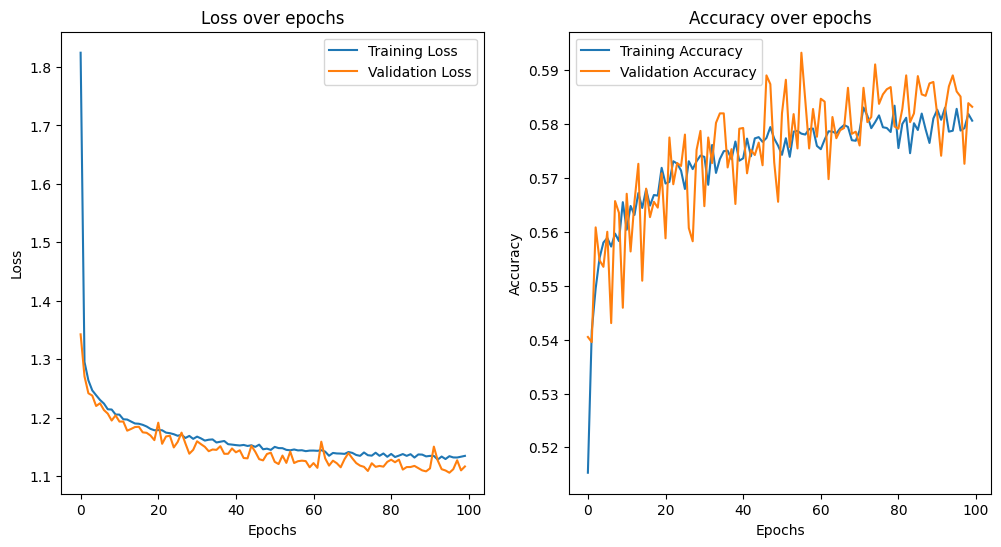

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4611 - loss: 2.6987 - val_accuracy: 0.5260 - val_loss: 1.3563
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5237 - loss: 1.3577 - val_accuracy: 0.5412 - val_loss: 1.2919
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5336 - loss: 1.3109 - val_accuracy: 0.5459 - val_loss: 1.2698
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5439 - loss: 1.2954 - val_accuracy: 0.5423 - val_loss: 1.2576
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5481 - loss: 1.2705 - val_accuracy: 0.5457 - val_loss: 1.2680
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5424 - loss: 1.2726 - val_accuracy: 0.5509 - val_loss: 1.2420
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5490 - loss: 1.2679 - val_accuracy: 0.5401 - val_loss: 1.2424
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5488 - loss: 1.2613 - val_accu

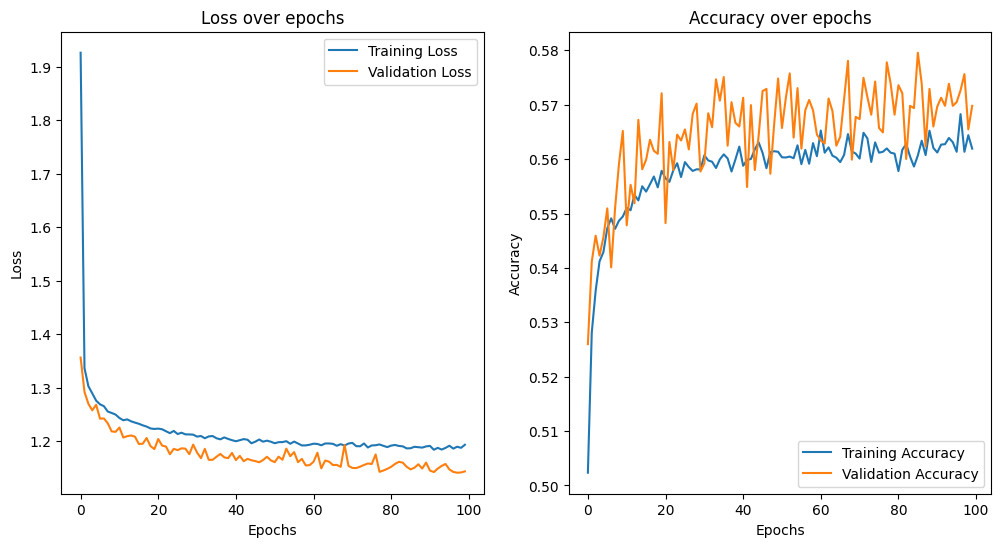

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4174 - loss: 2.9914 - val_accuracy: 0.5028 - val_loss: 1.4273
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5137 - loss: 1.4222 - val_accuracy: 0.5231 - val_loss: 1.3418
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5172 - loss: 1.3665 - val_accuracy: 0.5324 - val_loss: 1.3098
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5212 - loss: 1.3399 - val_accuracy: 0.5197 - val_loss: 1.3112
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5296 - loss: 1.3253 - val_accuracy: 0.5406 - val_loss: 1.2833
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5261 - loss: 1.3326 - val_accuracy: 0.5429 - val_loss: 1.2795
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5298 - loss: 1.3321 - val_accuracy: 0.5505 - val_loss: 1.2728
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5327 - loss: 1.3183 - val_accu

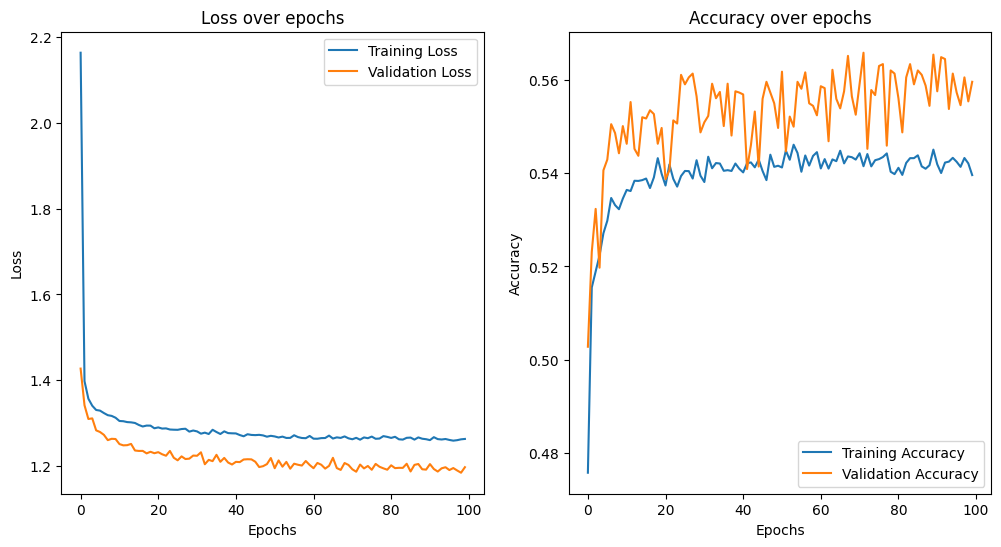

In [376]:
dropout_rates = [0.3, 0.5, 0.7]

for rate in dropout_rates:
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(96,)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(rate),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(rate),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Entrenamiento del modelo y evaluación
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2, 
                    #callbacks=[early_stopping]
                    )
    plot_history(history)


Cambios en regularización

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5258 - loss: 1.4874 - val_accuracy: 0.5748 - val_loss: 1.2127
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5941 - loss: 1.1750 - val_accuracy: 0.5794 - val_loss: 1.1536
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5961 - loss: 1.1175 - val_accuracy: 0.5883 - val_loss: 1.1287
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6062 - loss: 1.0849 - val_accuracy: 0.5988 - val_loss: 1.1045
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6107 - loss: 1.0588 - val_accuracy: 0.6021 - val_loss: 1.0850
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6190 - loss: 1.0550 - val_accuracy: 0.5878 - val_loss: 1.0982
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6135 - loss: 1.0471 - val_accuracy: 0.6098 - val_loss: 1.0746
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6239 - loss: 1.0230 - val_accu

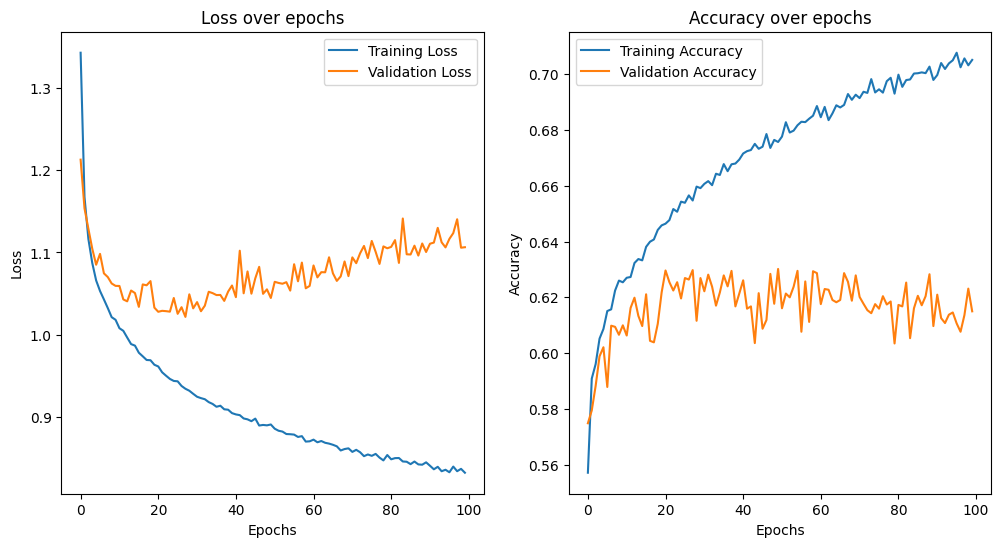

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5045 - loss: 2.4650 - val_accuracy: 0.5256 - val_loss: 1.3142
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5446 - loss: 1.2824 - val_accuracy: 0.5558 - val_loss: 1.2576
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5549 - loss: 1.2477 - val_accuracy: 0.5583 - val_loss: 1.2240
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5646 - loss: 1.2172 - val_accuracy: 0.5492 - val_loss: 1.2210
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5671 - loss: 1.1974 - val_accuracy: 0.5622 - val_loss: 1.1949
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5659 - loss: 1.1933 - val_accuracy: 0.5683 - val_loss: 1.1936
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5726 - loss: 1.1785 - val_accuracy: 0.5652 - val_loss: 1.1833
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5763 - loss: 1.1614 - val_accu

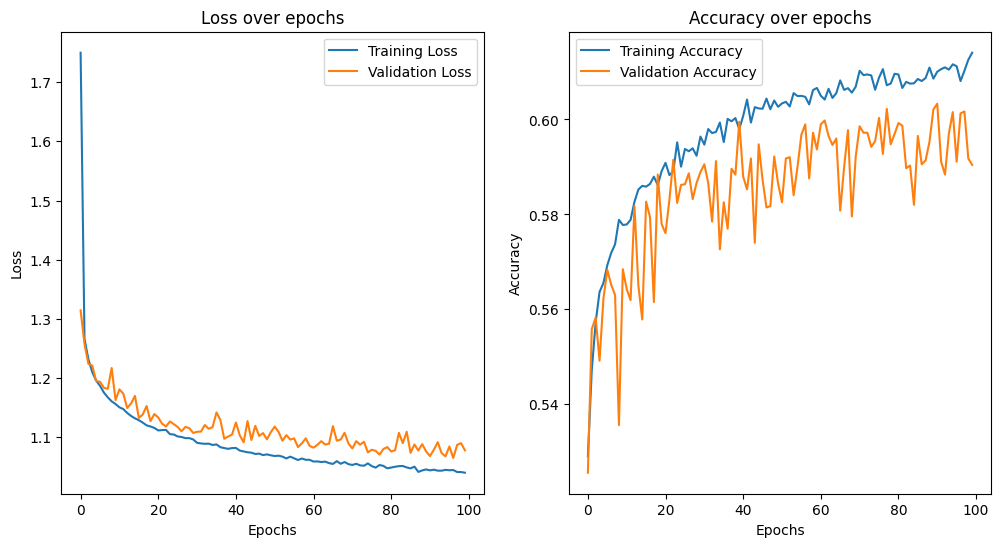

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4734 - loss: 9.5261 - val_accuracy: 0.5115 - val_loss: 1.4989
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5114 - loss: 1.4677 - val_accuracy: 0.5143 - val_loss: 1.4598
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5169 - loss: 1.4387 - val_accuracy: 0.5111 - val_loss: 1.4428
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5169 - loss: 1.4208 - val_accuracy: 0.5149 - val_loss: 1.4265
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5227 - loss: 1.4100 - val_accuracy: 0.5138 - val_loss: 1.4205
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5162 - loss: 1.4029 - val_accuracy: 0.5169 - val_loss: 1.4155
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5199 - loss: 1.3970 - val_accuracy: 0.5151 - val_loss: 1.4002
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5256 - loss: 1.3759 - val_accu

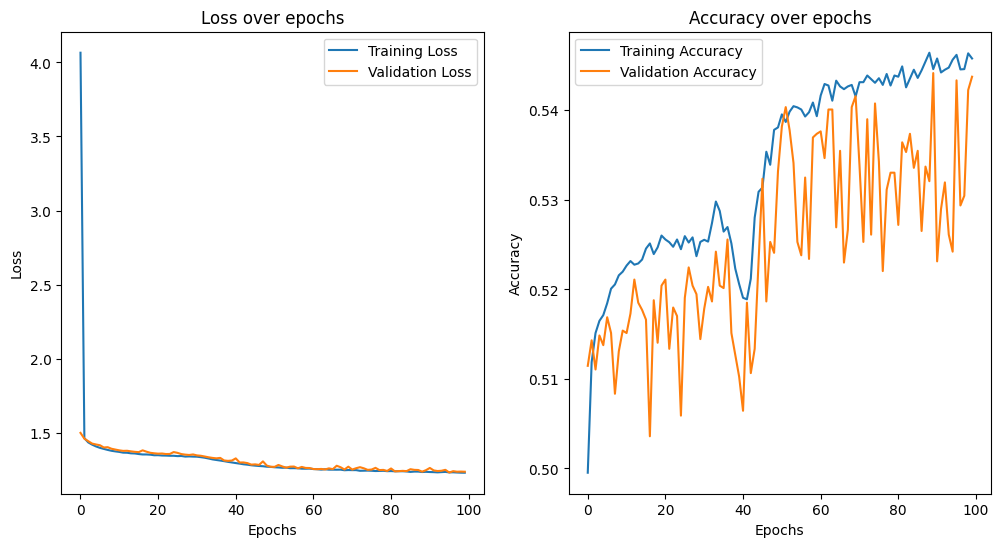

In [377]:
regularization_strengths = [0.001, 0.01, 0.1]

for reg in regularization_strengths:
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(96,)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(reg)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg)),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Entrenamiento del modelo y evaluación
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64, 
                    validation_split=0.2, 
                    #callbacks=[early_stopping]
                    )
    plot_history(history)


Conclusiones: Ningún Hiperparámetro probado mostró una mejora con respecto al modelo probado anteriormente. Probablemente para mejorar el modelo se deba trabajar más sobre los datos de entrada